# Objectif projet:   
   ###                         Prédire l'évolution  de la fraude
   #### MSE : le plus bas possible 
   #### R²  : plus  proche de  '0'
## Traduction en besoin ML : 
- **Régression Lineaire** :
         suivre le  comportement  du contribuable qui commence en 2013 par 0 et il progresse au fil des années
         
-------------

# Checklist de base
## Analyse:
- **Shape** :(25053, 121)  
- **Type de variable** : 119 Quantitaves, 2 Qualit (CTR_CATEGO_X, id)
- **Target** : aucune information sur la nature de la valeur
- target = 0  ----> 6325 valeurs
- target != 0 ----> 18370 valeurs

-------
## Traitement des valeurs manquantes : 
#### Les Features :
- **CTR** : 0  et  0,0399%  NAN ----> des taux
- **TVA** : 7% de NAN           ----> valeurs
- Plus de 90% des valeurs égale à '0' : "" TVA_CHAFF7 TVA_CHAF10 TVA_CAF125 TVA_CHAF15    TVA_CHAF29 TVA_CHAF36 TVA_MOIDEB  TVA_BASIMB TVA_DEDIMB  TVA_RSNRES TVA_TRSPOR TVA_MOIFIN TVA_ACHSUS  TVA_ACHEXO  TVA_ACHNDD TVA_AACHAB TVA_CRDBLQ TVA_CRDRES TVA_CRDRMP TVA_CRDREP TVA_MTVLSM TVA_TXVLSM TVA_MTALSM TVA_TXALSM TVA_MTORDTVA TVA_MTDJRTVA TVA_MTORDTAX TVA_MTDJRTAX TVA_MTRESTAX TVA_CA072018 TVA_CA132018 TVA_CA192018 ""
- **AX** : 24% de  NAN  (5)     ----> valeurs
-----
- **ADB** : 74% de  NAN  (1)    ----> valeur
- **SND_I** : 82% de  NAN  (7)  ----> valeurs
- **SND_A**: 86% de  NAN  (7)   ----> valeurs
-------
- **FAC / SND_E** > 90% de NAN  (15) ----> valeurs
-------
    
## Variables importantes et peu présentés:
- SND_MNTPRD_E :  	Montant Produit Exporté
- FAC_MFODEC_F : 	Montant taxe FODEC sur factures émises en susp.


- **Les Variables les plus inffluentes**:
- TVA_CRDFIN
- TVA_MNTPAY
- TVA_CHAF12
- TVA_CHAF18
- SND_MNTPRD_A
- SND_MNTPRD_E


In [1081]:
# importer les packages 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [1082]:
# afficher toutes les collones df_train
pd.set_option('display.max_column', 121)
# afficher toutes les lignes df_disc 'discription des variables'
pd.set_option('display.max_row', 190)

In [1083]:
# afficher df_train
df_train = pd.read_csv('train(1).csv')
df_train


,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,CTR_OBLDCO,CTR_OBLTVA,CTR_OFODEC,CTR_OFODEP,CTR_OFODET,CTR_OBLAUT,CTR_OBLASS,CTR_ODTIMB,CTR_OBLTCL,CTR_OBLTHO,CTR_OBLDLI,CTR_OBLTVI,CTR_RATISS,EXE_EXERCI,TVA_CHAFF6,TVA_CHAFF7,TVA_CHAF10,TVA_CHAF12,TVA_CAF125,TVA_CHAF15,TVA_CHAF18,TVA_CHAF22,TVA_CHAF29,TVA_CHAF36,TVA_TOTDUE,TVA_MOIDEB,TVA_CRDINI,TVA_BASIMB,TVA_DEDIMB,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_RSNRES,TVA_TRSPOR,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_MOIFIN,TVA_CRDFIN,TVA_ACHSUS,TVA_ACHEXO,TVA_ACHNDD,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_AACHAB,TVA_CRDBLQ,TVA_CRDRES,TVA_CRDRMP,TVA_CRDREP,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,TVA_MTVLSM,TVA_TXVLSM,TVA_MTALSM,TVA_TXALSM,TVA_MTORDTVA,TVA_MTDJRTVA,TVA_MTORDTAX,TVA_MTDJRTAX,TVA_MTRESTAX,TVA_CA072018,TVA_CA132018,TVA_CA192018,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_E,SND_MNTTVA_E,SND_MNTDRC_E,SND_MNTAVA_E,SND_MNTTAX_E,SND_MNTPAY_E,SND_MNTAIR_E,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,49,14185,P,99,1,6101,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2013,0.0,0.0,0.0,52600000.0,0.0,0.0,6.125000e+05,0.0,0.0,0.0,6422250.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.236080e+05,9896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6412354.0,12.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,58912000.0,0.0,2530630.0,0.000000e+00,2013,13.575957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id0
1,221,6032,P,99,0,6271,8,2,1,1,1,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2013,12000000.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,720000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720000.0,12.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3425295.0,0.0,10924985.0,0.000000e+00,2013,11.692894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id1
2,181,8907,P,99,0,6102,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,31926026.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,3831117.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.886150e+07,2209299.0,0.0,0.0,3566839.0,1783419.0,0.0,0.0,0.0,0.0,31150.0,12.0,192751.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34442746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id2
3,252,5783,M,22,0,4403,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,2.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,1.0,45425.0,0.0,0.0,0.0,0.0,0.0,0.0,9.083122e+06,1634962.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1680387.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,16.237871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id3
4,234,1477,P,99,0,6312,8,2,2,1,1,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,10999653.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1319958.0,1.0,0.0,0.0,0.0,1521555.0,273879.0,0.0,0.0,4.564665e+06,821637.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224442.0,12.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [1084]:
# Vu statistique de nos données
df_train.describe()

,BCT_CODBUR,CTR_MATFIS,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,CTR_OBLDCO,CTR_OBLTVA,CTR_OFODEC,CTR_OFODEP,CTR_OFODET,CTR_OBLAUT,CTR_OBLASS,CTR_ODTIMB,CTR_OBLTCL,CTR_OBLTHO,CTR_OBLDLI,CTR_OBLTVI,CTR_RATISS,EXE_EXERCI,TVA_CHAFF6,TVA_CHAFF7,TVA_CHAF10,TVA_CHAF12,TVA_CAF125,TVA_CHAF15,TVA_CHAF18,TVA_CHAF22,TVA_CHAF29,TVA_CHAF36,TVA_TOTDUE,TVA_MOIDEB,TVA_CRDINI,TVA_BASIMB,TVA_DEDIMB,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_RSNRES,TVA_TRSPOR,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_MOIFIN,TVA_CRDFIN,TVA_ACHSUS,TVA_ACHEXO,TVA_ACHNDD,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_AACHAB,TVA_CRDBLQ,TVA_CRDRES,TVA_CRDRMP,TVA_CRDREP,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,TVA_MTVLSM,TVA_TXVLSM,TVA_MTALSM,TVA_TXALSM,TVA_MTORDTVA,TVA_MTDJRTVA,TVA_MTORDTAX,TVA_MTDJRTAX,TVA_MTRESTAX,TVA_CA072018,TVA_CA132018,TVA_CA192018,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_E,SND_MNTTVA_E,SND_MNTDRC_E,SND_MNTAVA_E,SND_MNTTAX_E,SND_MNTPAY_E,SND_MNTAIR_E,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C
count,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.000000,25053.00000,25053.00000,25053.000000,25043.000000,25043.000000,25043.000000,25043.000000,25043.000000,25043.000000,25053.000000,25043.000000,25043.000000,25043.000000,25053.000000,25053.000000,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,23079.0,2.307900e+04,2.307900e+04,2.307900e+04,23079.000000,23079.0,2.307900e+04,23079.000000,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,23079.000000,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,23079.0,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,23079.0,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,6.311000e+03,4.372000e+03,4.372000e+03,4.372000e+03,4372.0,4.372000e+03,4.372000e+03,4.372000e+03,1.443000e+03,1443.0,1443.0,1443.0,1.443000e+03,1.443000e+03,1443.0,3.422000e+03,3.422000e+03,3.422000e+03,3422.0,3.422000e+03,3.422000e+03,3.422000e+03,1.901000e+04,1.901000e+04,1.901000e+04,1.901000e+04,1.901000e+04,25053.000000,25053.000000,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.474000e+03,2.474000e+03,2.474000e+03,2.474000e+03
mean,214.937453,7791.431326,59.582685,0.048697,4818.192791,4.451483,1.960444,1.977049,1.927913,1.94827,1.00495,2.039077,1.091483,1.003554,1.017450,1.020485,1.000040,1.473306,2.982717,1.013257,1.037615,1.002236,0.021634,2014.503533,1.709656e+08,1.566465e+05,2.355829e+03,1.821056e+08,0.0,3.605977e+05,1.849092e+09,1.454668e+07,63.051129,0.0,3.892477e+08,1.199619,6.457708e+07,2.853199e+06,5.138661e+05,2.099558e+08,3.327674e+07,1.037841e+08,1.065354e+07,1.283733e+09,1.986668e+08,5.441586e+08,8.709237e+07,4.509353e+07,1.935356e+07,2.895640e+06,1.246818e+05,1.124016e+06,3.267092e+07,6.718077e+07,11.852247,6.580949e+07,6.424153e+05,3.636842e+07,6.424153e+05,4.309808e+08,2.153343e+08,2.838778e+08,9.826111e+04,8.849591e+05,4.265801e+05,5.269146e+06,0.0,5.697102e+06,3.567376e+06,2.547239e+07,1.542188e+06,2.753102e+05,1.449797e+06,2.603344e+05,1.812852e+06,5.407147e+06,0.0,5.705436e+04,5.705436e+04,4.175525e+06,4.834557e+05,8.517490e+07,5.306010e+08,3.574164e+09,5.241215e+08,5.029389e+07,0.0,1.415013e+08,7.132428e+08,3.649068e+08,1.653139e+09,0.0,0.0,0.0,5.258910e+06,5.258910e+06,0.0,7.983565e+09,1.727859e+06,1.425769e+06

In [1085]:
# afficher df_disc
df_disc = pd.read_csv('VariableDescription.csv')
df_disc

,Libellé,Intitulé
0,Contribuable,NaN
1,BCT_CODBUR,Code Bureau de contrôle des impôts
2,CTR_MATFIS,ID Contribuable
3,CTR_CATEGO_x,Catégorie Contribuable
4,CTR_CODTVA,Code TVA
5,FJU_CODFJU,Code Forme Juridique
6,CTR_CESSAT,"Code Cessation (0 : Actif, 1 : en cessation)"
7,ACT_CODACT,Code Activité
8,CTR_OBLDIR,Obligation
9,CTR_OBLACP,Obligation Acompte Provisionnel


### 1) EDA

In [1086]:
df_train = df_train.drop(['BCT_CODBUR','CTR_MATFIS','FJU_CODFJU', 'ACT_CODACT','id','RES_ANNIMP'], axis=1)

In [1087]:
code ={'M':0,'C':1,'P':2,'N':3}
df_train['CTR_CATEGO_X'] = df_train['CTR_CATEGO_X'].map(code)

In [1088]:
df_train

,CTR_CATEGO_X,CTR_CESSAT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,CTR_OBLDCO,CTR_OBLTVA,CTR_OFODEC,CTR_OFODEP,CTR_OFODET,CTR_OBLAUT,CTR_OBLASS,CTR_ODTIMB,CTR_OBLTCL,CTR_OBLTHO,CTR_OBLDLI,CTR_OBLTVI,CTR_RATISS,EXE_EXERCI,TVA_CHAFF6,TVA_CHAFF7,TVA_CHAF10,TVA_CHAF12,TVA_CAF125,TVA_CHAF15,TVA_CHAF18,TVA_CHAF22,TVA_CHAF29,TVA_CHAF36,TVA_TOTDUE,TVA_MOIDEB,TVA_CRDINI,TVA_BASIMB,TVA_DEDIMB,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_RSNRES,TVA_TRSPOR,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_MOIFIN,TVA_CRDFIN,TVA_ACHSUS,TVA_ACHEXO,TVA_ACHNDD,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_AACHAB,TVA_CRDBLQ,TVA_CRDRES,TVA_CRDRMP,TVA_CRDREP,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,TVA_MTVLSM,TVA_TXVLSM,TVA_MTALSM,TVA_TXALSM,TVA_MTORDTVA,TVA_MTDJRTVA,TVA_MTORDTAX,TVA_MTDJRTAX,TVA_MTRESTAX,TVA_CA072018,TVA_CA132018,TVA_CA192018,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_E,SND_MNTTVA_E,SND_MNTDRC_E,SND_MNTAVA_E,SND_MNTTAX_E,SND_MNTPAY_E,SND_MNTAIR_E,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C
0,2,1,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2013,0.0,0.0,0.0,52600000.0,0.0,0.0,6.125000e+05,0.0,0.0,0.0,6422250.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.236080e+05,9896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6412354.0,12.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,58912000.0,0.0,2530630.0,0.000000e+00,13.575957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,8,2,1,1,1,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2013,12000000.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,720000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720000.0,12.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3425295.0,0.0,10924985.0,0.000000e+00,11.692894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,31926026.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,3831117.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.886150e+07,2209299.0,0.0,0.0,3566839.0,1783419.0,0.0,0.0,0.0,0.0,31150.0,12.0,192751.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34442746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,4,2,2,2,2,1,2,1.0,1.0,1.0,1.0,1.0,2.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,1.0,45425.0,0.0,0.0,0.0,0.0,0.0,0.0,9.083122e+06,1634962.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1680387.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.237871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0,8,2,2,1,1,1,2,1.0,1.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1.0,0,2015,0.0,0.0,0.0,10999653.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1319958.0,1.0,0.0,0.0,0.0,1521555.0,273879.0,0.0,0.0,4.564665e+06,821637.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224442.0,12.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21604529.0,0.0,0.0,0.000000e+00,13.399983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [1089]:
df = df_train.copy()

In [1090]:
# les dimension du df
df.shape

(25053, 115)

In [1091]:
# types de mon df
df.dtypes.value_counts()

float64    103
int64       12
dtype: int64

In [1093]:
# afficher df avec NAN
df.isna()

,CTR_CATEGO_X,CTR_CESSAT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,CTR_OBLDCO,CTR_OBLTVA,CTR_OFODEC,CTR_OFODEP,CTR_OFODET,CTR_OBLAUT,CTR_OBLASS,CTR_ODTIMB,CTR_OBLTCL,CTR_OBLTHO,CTR_OBLDLI,CTR_OBLTVI,CTR_RATISS,EXE_EXERCI,TVA_CHAFF6,TVA_CHAFF7,TVA_CHAF10,TVA_CHAF12,TVA_CAF125,TVA_CHAF15,TVA_CHAF18,TVA_CHAF22,TVA_CHAF29,TVA_CHAF36,TVA_TOTDUE,TVA_MOIDEB,TVA_CRDINI,TVA_BASIMB,TVA_DEDIMB,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_RSNRES,TVA_TRSPOR,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_MOIFIN,TVA_CRDFIN,TVA_ACHSUS,TVA_ACHEXO,TVA_ACHNDD,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_AACHAB,TVA_CRDBLQ,TVA_CRDRES,TVA_CRDRMP,TVA_CRDREP,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,TVA_MTVLSM,TVA_TXVLSM,TVA_MTALSM,TVA_TXALSM,TVA_MTORDTVA,TVA_MTDJRTVA,TVA_MTORDTAX,TVA_MTDJRTAX,TVA_MTRESTAX,TVA_CA072018,TVA_CA132018,TVA_CA192018,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_E,SND_MNTTVA_E,SND_MNTDRC_E,SND_MNTAVA_E,SND_MNTTAX_E,SND_MNTPAY_E,SND_MNTAIR_E,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
4,False,False,False,False

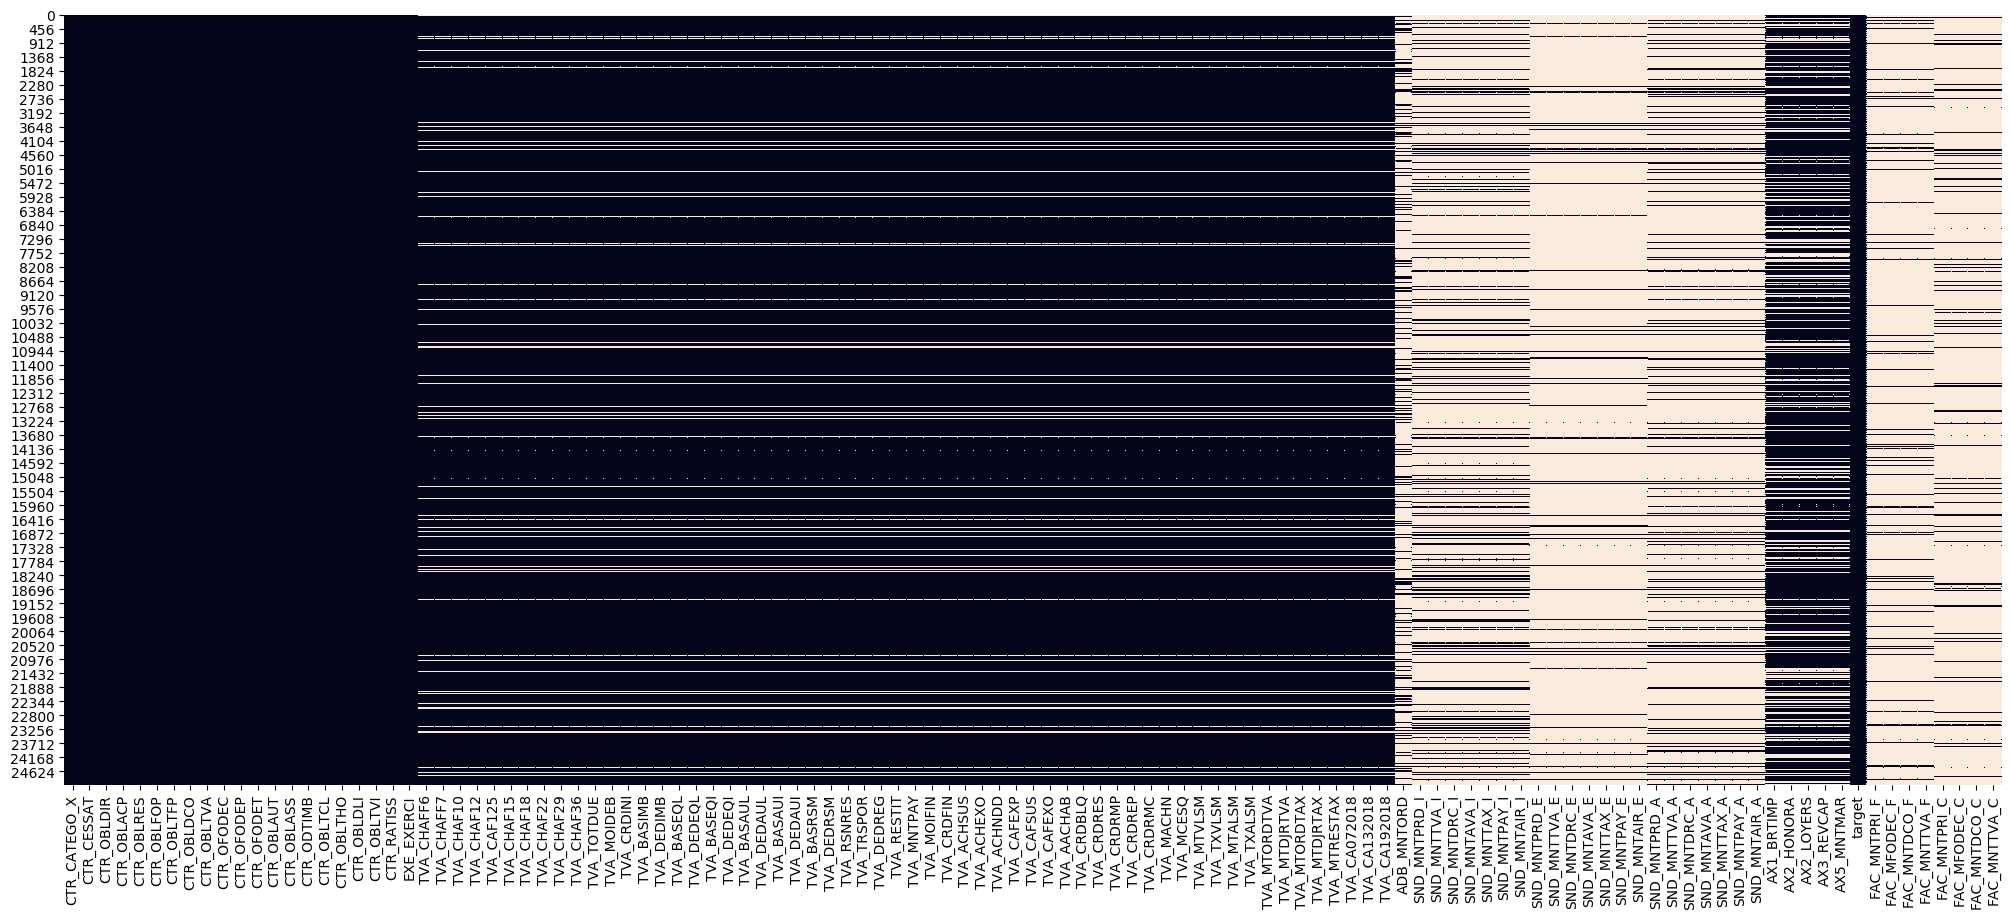

In [1094]:
# afficher le remplissage du df en heatmap 
plt.figure(figsize=(25,10))
sns.heatmap(df.isna(), cbar=False)

In [1095]:
# afficher le pourcentage des valeurs NAN
#autre méthode: df.isna().sum()/len(df)
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

CTR_CATEGO_X    0.000000
CTR_CESSAT      0.000000
CTR_OBLDIR      0.000000
CTR_OBLACP      0.000000
CTR_OBLRES      0.000000
CTR_OBLFOP      0.000000
CTR_OBLTFP      0.000000
CTR_OBLDCO      0.000000
CTR_OBLTVA      0.000000
target          0.000000
EXE_EXERCI      0.000000
CTR_RATISS      0.000000
CTR_OBLTCL      0.000000
CTR_OBLTVI      0.000399
CTR_OBLTHO      0.000399
CTR_OBLDLI      0.000399
CTR_OBLASS      0.000399
CTR_OBLAUT      0.000399
CTR_OFODET      0.000399
CTR_OFODEP      0.000399
CTR_OFODEC      0.000399
CTR_ODTIMB      0.000399
TVA_CRDREP      0.078793
TVA_CRDRMP      0.078793
TVA_CRDRES      0.078793
TVA_CRDBLQ      0.078793
TVA_AACHAB      0.078793
TVA_ACHNDD      0.078793
TVA_CAFEXP      0.078793
TVA_ACHEXO      0.078793
TVA_ACHSUS      0.078793
TVA_CRDFIN      0.078793
TVA_CRDRMC      0.078793
TVA_CAFEXO      0.078793
TVA_MACHN       0.078793
TVA_CA072018    0.078793
TVA_MTVLSM      0.078793
TVA_TXVLSM      0.078793
TVA_MTALSM      0.078793
TVA_TXALSM      0.078793


### df < 90% NAN    +    'FAC_MFODEC_C'    +   'SND_MNTPRD_E'

In [1098]:
df = df.drop(['SND_MNTPRD_E','SND_MNTTVA_E','SND_MNTDRC_E','SND_MNTAVA_E','SND_MNTTAX_E','SND_MNTPAY_E','SND_MNTAIR_E','FAC_MNTPRI_F','FAC_MFODEC_F','FAC_MNTDCO_F','FAC_MNTTVA_F','FAC_MNTPRI_C','FAC_MFODEC_C','FAC_MNTDCO_C','FAC_MNTTVA_C'] ,axis=1)

In [1099]:
tva = df[['TVA_CHAFF6','TVA_CHAFF7','TVA_CHAF10',
'TVA_CHAF12',
'TVA_CAF125',
'TVA_CHAF15',
'TVA_CHAF18',
'TVA_CHAF22',
'TVA_CHAF29',
'TVA_CHAF36',
'TVA_TOTDUE',
'TVA_MOIDEB',
'TVA_CRDINI',
'TVA_BASIMB',
'TVA_DEDIMB',
'TVA_BASEQL',
'TVA_DEDEQL',
'TVA_BASEQI',
'TVA_DEDEQI',
'TVA_BASAUL',
'TVA_DEDAUL',
'TVA_BASAUI',
'TVA_DEDAUI',
'TVA_BASRSM',
'TVA_DEDRSM',
'TVA_RSNRES',
'TVA_TRSPOR',
'TVA_DEDREG',
'TVA_RESTIT',
'TVA_MNTPAY',
'TVA_MOIFIN',
'TVA_CRDFIN',
'TVA_ACHSUS',
'TVA_ACHEXO',
'TVA_ACHNDD',
'TVA_CAFEXP',
'TVA_CAFSUS',
'TVA_CAFEXO',
'TVA_AACHAB',
'TVA_CRDBLQ',
'TVA_CRDRES',
'TVA_CRDRMP',
'TVA_CRDREP',
'TVA_CRDRMC',
'TVA_MACHN',
'TVA_MCESQ',
'TVA_MTVLSM',
'TVA_TXVLSM',
'TVA_MTALSM',
'TVA_TXALSM',
'TVA_MTORDTVA',
'TVA_MTDJRTVA',
'TVA_MTORDTAX',
'TVA_MTDJRTAX',
'TVA_MTRESTAX',
'TVA_CA072018',
'TVA_CA132018',
'TVA_CA192018']]

In [1100]:
# définir les colonnes TVA'a supprimer '
for col in tva:
    (df[col]== 0).value_counts() / len(df[col]) > 0.9
    print((df[col]== 0).value_counts() / len(df[col]) > 0.9)
    

True     False
False    False
Name: TVA_CHAFF6, dtype: bool
True      True
False    False
Name: TVA_CHAFF7, dtype: bool
True      True
False    False
Name: TVA_CHAF10, dtype: bool
True     False
False    False
Name: TVA_CHAF12, dtype: bool
True      True
False    False
Name: TVA_CAF125, dtype: bool
True      True
False    False
Name: TVA_CHAF15, dtype: bool
False    False
True     False
Name: TVA_CHAF18, dtype: bool
True     False
False    False
Name: TVA_CHAF22, dtype: bool
True      True
False    False
Name: TVA_CHAF29, dtype: bool
True      True
False    False
Name: TVA_CHAF36, dtype: bool
False    False
True     False
Name: TVA_TOTDUE, dtype: bool
False    True
Name: TVA_MOIDEB, dtype: bool
False    False
True     False
Name: TVA_CRDINI, dtype: bool
True      True
False    False
Name: TVA_BASIMB, dtype: bool
True      True
False    False
Name: TVA_DEDIMB, dtype: bool
True     False
False    False
Name: TVA_BASEQL, dtype: bool
True     False
False    False
Name: TVA_DEDEQL, dtype: b

In [1102]:
# supprimer la colonne :  codes /  taux d''obligation' / TVA > 90% = 0
df = df.drop(['CTR_OBLDIR','CTR_OBLACP','CTR_OBLRES','CTR_OBLFOP','CTR_OBLTFP','CTR_OBLDCO','CTR_OBLTVA','CTR_OFODEC','CTR_OFODEP','CTR_OFODET','CTR_OBLAUT','CTR_OBLASS','CTR_ODTIMB','CTR_OBLTCL','CTR_OBLTHO','CTR_OBLDLI','CTR_OBLTVI','CTR_RATISS', 'TVA_CHAFF7' ,'TVA_CHAF10', 'TVA_CAF125', 'TVA_CHAF15'  ,  'TVA_CHAF29' ,'TVA_CHAF36' ,'TVA_MOIDEB' , 'TVA_BASIMB', 'TVA_DEDIMB' , 'TVA_RSNRES' ,'TVA_TRSPOR' ,'TVA_MOIFIN', 'TVA_ACHSUS' , 'TVA_ACHEXO' , 'TVA_ACHNDD' ,'TVA_AACHAB' ,'TVA_CRDBLQ', 'TVA_CRDRES', 'TVA_CRDRMP' ,'TVA_CRDREP', 'TVA_MTVLSM', 'TVA_TXVLSM', 'TVA_MTALSM', 'TVA_TXALSM' ,'TVA_MTORDTVA' ,'TVA_MTDJRTVA', 'TVA_MTORDTAX' ,'TVA_MTDJRTAX' ,'TVA_MTRESTAX' ,'TVA_CA072018' ,'TVA_CA132018' ,'TVA_CA192018'],  axis=1)

# df

In [1103]:
df

,CTR_CATEGO_X,CTR_CESSAT,EXE_EXERCI,TVA_CHAFF6,TVA_CHAF12,TVA_CHAF18,TVA_CHAF22,TVA_TOTDUE,TVA_CRDINI,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_CRDFIN,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,target
0,2,1,2013,0.0,52600000.0,6.125000e+05,0.0,6422250.0,0.0,0.0,0.0,0.0,0.0,1.236080e+05,9896.0,0.0,0.0,0.0,0.0,0.0,0.0,6412354.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,58912000.0,0.0,2530630.0,0.000000e+00,13.575957
1,2,0,2013,12000000.0,0.0,0.000000e+00,0.0,720000.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720000.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3425295.0,0.0,10924985.0,0.000000e+00,11.692894
2,2,0,2015,0.0,31926026.0,0.000000e+00,0.0,3831117.0,0.0,0.0,0.0,0.0,0.0,1.886150e+07,2209299.0,0.0,0.0,3566839.0,1783419.0,0.0,0.0,31150.0,192751.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,34442746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3,0,0,2015,0.0,0.0,0.000000e+00,0.0,0.0,45425.0,0.0,0.0,0.0,0.0,9.083122e+06,1634962.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1680387.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.237871
4,2,0,2015,0.0,10999653.0,0.000000e+00,0.0,1319958.0,0.0,1521555.0,273879.0,0.0,0.0,4.564665e+06,821637.0,0.0,0.0,0.0,0.0,0.0,0.0,224442.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21604529.0,0.0,0.0,0.000000e+00,13.399983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25048,1,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.355379e+08,16.183079
25049,0,0,2015,0.0,0.0,1.943510e+09,0.0,349831750.0,278182901.0,0.0,0.0,0.0,0.0,3.240247e+09,583246881.0,0.0,0.0,15982684.0,7991342.0,0.0,0.0,0.0,503679542.0,1.258497e+09,49339033.0,0.0,0.0,17404727.0,1303829.0,NaN,1.322304e+09,252630377.0,1965479.0,0.0,89303793.0,343899649.0,3857872.0,48566562.0,0.0,0.0,0.0,150000.0,150000.0,0.0,0.0,0.0,1416500.0,8656338.0,1.301083e+09,0.000000
25050,2,0,2013,109424528.0,0.0,0.000000e+00,0.0,6565465.0,2766494.0,4676425.0,841756.0,0.0,0.0,9.816865e+06,1690411.0,0.0,0.0,0.0,0.0,0.0,0.0,1266808.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4560000.0,0.0,419726.0,0.000000e+00,15.320684
25051,2,0,2013,0.0,107800000.0,0.000000e+00,0.0,12936000.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12936000.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,120736000.0,0.0,0.0,0.000000e+00,15.682378


### Relation "année / target"

In [1104]:
df_ann = df[['EXE_EXERCI','target']]

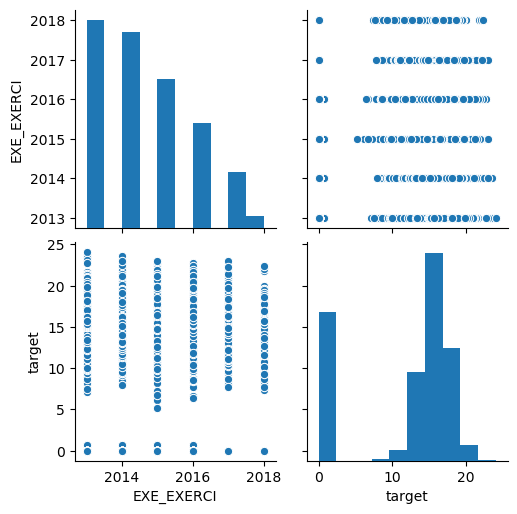

In [1105]:
sns.pairplot(df_ann)

In [1106]:
df.groupby(['EXE_EXERCI', 'target']).count().head(100)

CTR_CATEGO_X  CTR_CESSAT  TVA_CHAFF6  TVA_CHAF12  \
EXE_EXERCI target                                                        
2013       0.000000           1872        1872        1696        1696   
           0.693147              5           5           5           5   
           7.100027              1           1           1           1   
           7.496097              1           1           1           1   
           8.225503              1           1           1           1   
           8.401782              1           1           1           1   
           8.469263              1           1           1           1   
           8.613049              1           1           1           1   
           8.651724              1           1           1           1   
           8.877661              1           1           1           1   
           9.276034              1           1           1           1   
           9.279400              1           1           1           1   
           9.325988              1           1           1           1   
           9.328212              1           1           1           1   
           9.357294              1           1           1           1   
           9.357553              1           1           1           1   
           9.417598              1           1           1           1   
           9.615872              1           1           0           0   
           9.749345              1           1           1           1   
           9.751385              1           1           1           1   
           9.782562              1           1           1           1   
           9.798183              1           1           1           1   
           9.850930              1           1           1           1   
           9.883285              1           1           1           1   
           9.974039              1           1           1           1   
           10.017307             1           1           1           1   
           10.085851             1           1           0           0   
           10.157703             1           1           1           1   
           10.230306             1           1           1           1   
           10.236167             1           1           1           1   
           10.308986             1           1           1           1   
           10.357267             1           1           1           1   
           10.377950             1           1           1           1   
           10.462989             1           1           1           1   
           10.558180             1           1           1           1   
           10.563181             1           1           1           1   
           10.656224             1           1           1           1   
           10.705825             1           1           1           1   
           10.714440             1           1           0           0   
           10.732280             1           1           1           1   
           10.753211             1           1           1           1   
           10.804868             1           1           1           1   
           10.825820             1           1           1           1   
           10.860901             1           1           1           1   
           10.947872             1           1           1           1   
           10.949648             1           1           1           1   
           11.002117             1           1           1           1   
           11.084954             1           1           1           1   
           11.105198             1           1           1           1   
           11.117406             1           1           1           1   
           11.119364             1           1           1           1   
           11.136806             1           1           1           1   
           11.166554      

### "CTR_CATEGO_X"  valeur 'object' 

In [1107]:
df['CTR_CATEGO_X'].unique()

array([2, 0, 1, 3], dtype=int64)

In [1108]:
df['CTR_CATEGO_X'].value_counts()

0    12809
1     6835
2     5398
3       11
Name: CTR_CATEGO_X, dtype: int64

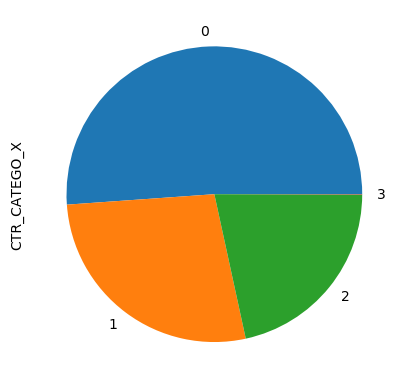

In [1109]:
df['CTR_CATEGO_X'].value_counts().plot.pie()

#### Etude de la target:

In [1110]:
df['target'].isna().sum()

0

In [1111]:
df['target'].shape

(25053,)

In [1112]:
df['target'].value_counts()

0.000000     6325
0.693147       18
12.100718      16
14.585619      11
12.117526       9
             ... 
15.221883       1
17.443046       1
15.898563       1
13.928408       1
17.725928       1
Name: target, Length: 18370, dtype: int64

In [1113]:
df['target'].value_counts() !=0

0.000000     True
0.693147     True
12.100718    True
14.585619    True
12.117526    True
             ... 
15.221883    True
17.443046    True
15.898563    True
13.928408    True
17.725928    True
Name: target, Length: 18370, dtype: bool

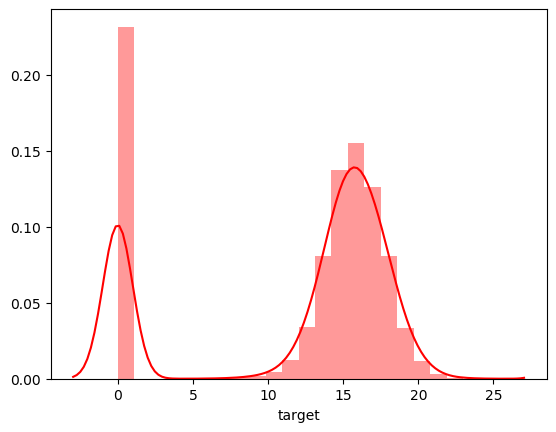

In [1114]:
sns.distplot(df['target'], color='red', bins = 22)

### Création de deux df :
#### n_fr : non fraudeurs 
#### fr :     fraudeurs 

In [1115]:
n_fr = df[df['target'] ==0]
fr = df[df['target'] != 0]

In [1116]:
n_fr

,CTR_CATEGO_X,CTR_CESSAT,EXE_EXERCI,TVA_CHAFF6,TVA_CHAF12,TVA_CHAF18,TVA_CHAF22,TVA_TOTDUE,TVA_CRDINI,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_CRDFIN,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,target
2,2,0,2015,0.0,31926026.0,0.000000e+00,0.0,3.831117e+06,0.000000e+00,0.0,0.0,0.0,0.0,1.886150e+07,2.209299e+06,0.000000e+00,0.000000e+00,3566839.0,1783419.0,0.0,0.000000e+00,31150.0,192751.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,34442746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
14,0,0,2013,0.0,0.0,3.420157e+07,0.0,6.156282e+06,1.575349e+07,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,9597209.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,40357854.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
15,0,0,2014,0.0,0.0,5.415305e+08,0.0,9.747548e+07,8.826676e+07,0.0,0.0,0.0,0.0,1.739615e+08,3.060857e+07,3.637110e+08,6.543137e+07,0.0,0.0,0.0,0.000000e+00,0.0,86831235.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,NaN,2.164410e+08,6.428044e+07,272665.0,0.0,73727432.0,1.382805e+08,1.128257e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.621320e+06,0.0
16,0,0,2014,0.0,0.0,7.711313e+08,0.0,1.388036e+08,7.555872e+06,0.0,0.0,0.0,0.0,6.313471e+08,1.087596e+08,0.000000e+00,0.000000e+00,40500012.0,20250006.0,0.0,0.000000e+00,19088872.0,16850766.0,5.033386e+07,0.000000e+00,0.0,0.0,0.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,33188985.0,0.0,0.0,1.526048e+09,0.0
17,0,0,2016,0.0,0.0,1.713629e+10,0.0,3.084532e+09,1.382065e+09,0.0,0.0,0.0,0.0,4.668803e+09,8.150345e+08,1.351133e+10,2.432040e+09,93257464.0,23314366.0,0.0,1.588397e+09,125466798.0,104990786.0,7.811132e+09,4.179611e+09,0.0,0.0,17416897.0,1.349238e+09,NaN,1.225413e+10,2.227577e+09,9240.0,0.0,577122433.0,2.804708e+09,1.108068e+07,1.274057e+10,25503375.0,0.0,0.0,6449830.0,31953205.0,0.0,0.0,15602500.0,0.0,0.0,6.131419e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25027,0,0,2015,0.0,0.0,0.000000e+00,0.0,0.000000e+00,4.320970e+05,0.0,0.0,0.0,0.0,2.894227e+06,4.932290e+05,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,925326.0,0.000000e+00,3.316168e+08,27361000.0,0.0,0.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3.347119e+08,0.0
25033,0,0,2014,0.0,0.0,0.000000e+00,0.0,0.000000e+00,9.516734e+07,0.0,0.0,0.0,0.0,1.203845e+08,3.009773e+06,0.000000e+00,0.000000e+00,0.0,0.0,0.0,8.402044e+07,0.0,14156681.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
25039,2,0,2013,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,59167978.0,7466754.0,0.0,0.0,2.445311e+06,3.817530e+05,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,36068845.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
25041,0,0,2015,27086662.0,35000.0,2.337056e+10,0.0,4.208330e+09,7.027918e+08,0.0,0.0,0.0,0.0,9.014046e+09,1.599240e+09,1.373241e+10,2.471834e+09,27247448.0,13623724.0,0.0,0.000000e+00,0.0,579159797.0,9.573787e+08,1.679015e+09,0.0,0.0,0.0,0.000000e+00,1288820.0,1.318238e+10,2.385316e+09,0.0,0.0,143271729.0,2.528588e+09,9.146184e+07,2.500000e+06,0.0,0.0,0.0,20000.0,20000.0,0.0,0.0,153846160.0,32188293.0,0.0,5.895192e+09,0.0


### Créer des sous-ensembles 'subset' : SND_I  , SND_A, ADB

In [1117]:
fr

,CTR_CATEGO_X,CTR_CESSAT,EXE_EXERCI,TVA_CHAFF6,TVA_CHAF12,TVA_CHAF18,TVA_CHAF22,TVA_TOTDUE,TVA_CRDINI,TVA_BASEQL,TVA_DEDEQL,TVA_BASEQI,TVA_DEDEQI,TVA_BASAUL,TVA_DEDAUL,TVA_BASAUI,TVA_DEDAUI,TVA_BASRSM,TVA_DEDRSM,TVA_DEDREG,TVA_RESTIT,TVA_MNTPAY,TVA_CRDFIN,TVA_CAFEXP,TVA_CAFSUS,TVA_CAFEXO,TVA_CRDRMC,TVA_MACHN,TVA_MCESQ,ADB_MNTORD,SND_MNTPRD_I,SND_MNTTVA_I,SND_MNTDRC_I,SND_MNTAVA_I,SND_MNTTAX_I,SND_MNTPAY_I,SND_MNTAIR_I,SND_MNTPRD_A,SND_MNTTVA_A,SND_MNTDRC_A,SND_MNTAVA_A,SND_MNTTAX_A,SND_MNTPAY_A,SND_MNTAIR_A,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,target
0,2,1,2013,0.0,52600000.0,612500.0,0.0,6422250.0,0.0,0.0,0.0,0.0,0.0,123608.0,9896.0,0.0,0.0,0.0,0.0,0.0,0.0,6412354.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,58912000.0,0.0,2530630.0,0.0,13.575957
1,2,0,2013,12000000.0,0.0,0.0,0.0,720000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3425295.0,0.0,10924985.0,0.0,11.692894
3,0,0,2015,0.0,0.0,0.0,0.0,0.0,45425.0,0.0,0.0,0.0,0.0,9083122.0,1634962.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1680387.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.237871
4,2,0,2015,0.0,10999653.0,0.0,0.0,1319958.0,0.0,1521555.0,273879.0,0.0,0.0,4564665.0,821637.0,0.0,0.0,0.0,0.0,0.0,0.0,224442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21604529.0,0.0,0.0,0.0,13.399983
5,1,0,2013,0.0,349968660.0,0.0,0.0,41996238.0,85713633.0,0.0,0.0,0.0,0.0,366647316.0,65980118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109697513.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.187975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25047,0,0,2016,0.0,0.0,189680509.0,0.0,34142485.0,10055960.0,32184219.0,5793159.0,0.0,0.0,70207145.0,12610856.0,53001213.0,9528596.0,0.0,0.0,0.0,0.0,0.0,3846086.0,0.0,0.0,0.0,0.0,0.0,0.0,1167519.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,22937500.0,0.0,0.0,737782.0,16.173889
25048,1,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,235537916.0,16.183079
25050,2,0,2013,109424528.0,0.0,0.0,0.0,6565465.0,2766494.0,4676425.0,841756.0,0.0,0.0,9816865.0,1690411.0,0.0,0.0,0.0,0.0,0.0,0.0,1266808.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4560000.0,0.0,419726.0,0.0,15.320684
25051,2,0,2013,0.0,107800000.0,0.0,0.0,12936000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12936000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,120736000.0,0.0,0.0,0.0,15.682378


### Etude générale

In [1118]:
##df.isna().sum()/len(df)
missing_rate = df.isna().sum()/df.shape[0]

In [1119]:
snd_i_columns = df.columns[(missing_rate< 0.86) & (missing_rate> 0.82)]
snd_a_columns = df.columns[(missing_rate< 0.9) & (missing_rate> 0.86)]
adb_columns = df.columns[(missing_rate< 0.75) & (missing_rate> 0.74)]
snd = df.columns[(missing_rate< 0.9)& (missing_rate > 0.82)]

### Target / SND_I

In [1120]:
snd_i_columns

Index(['SND_MNTPRD_I', 'SND_MNTTVA_I', 'SND_MNTDRC_I', 'SND_MNTAVA_I',
       'SND_MNTTAX_I', 'SND_MNTPAY_I', 'SND_MNTAIR_I'],
      dtype='object')

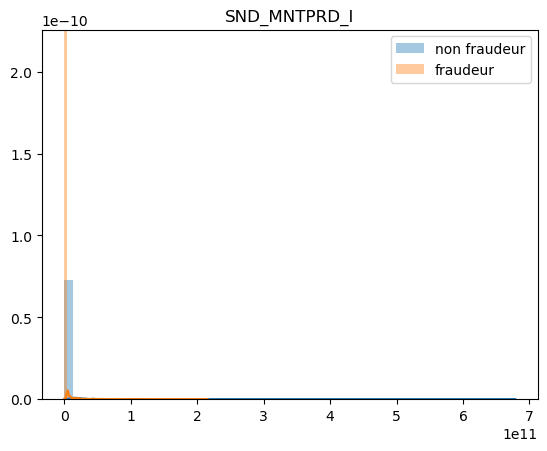

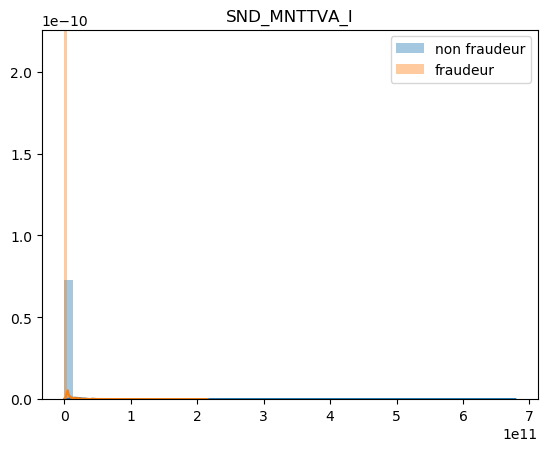

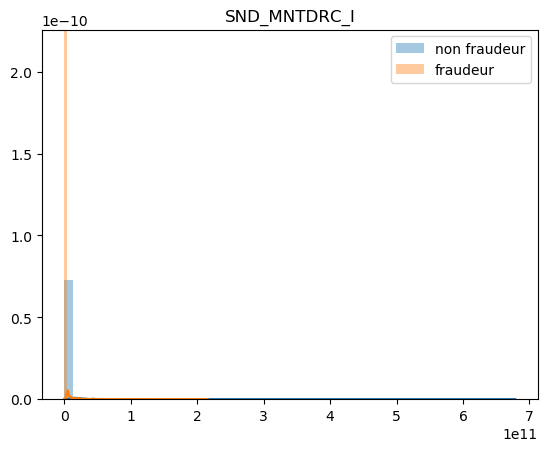

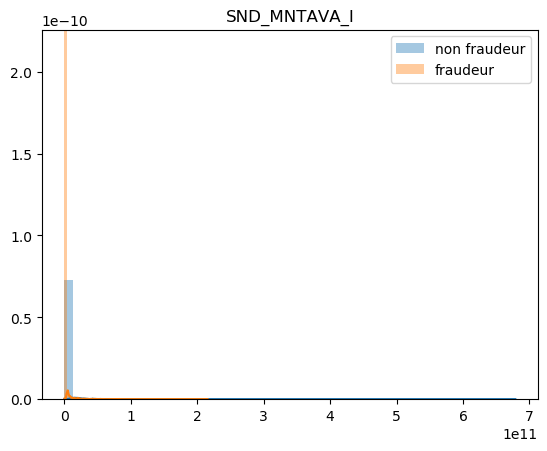

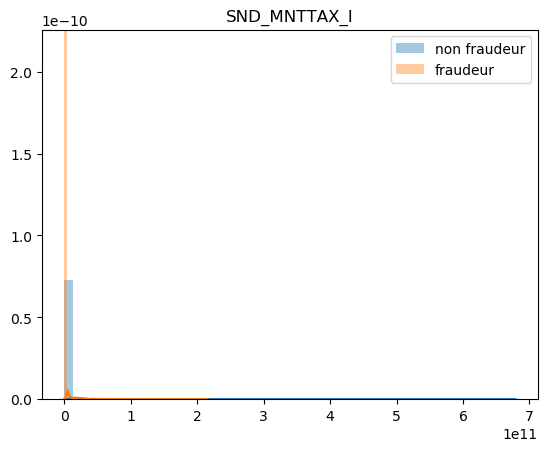

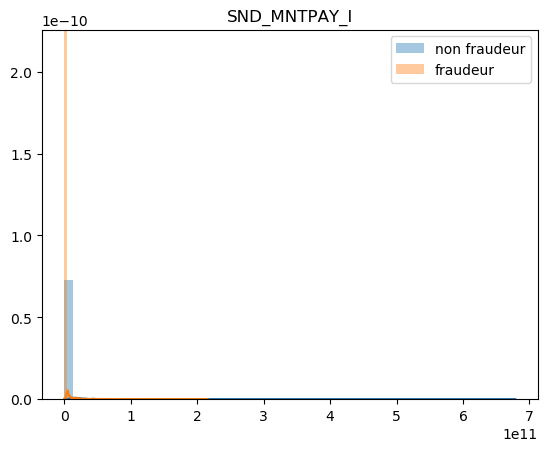

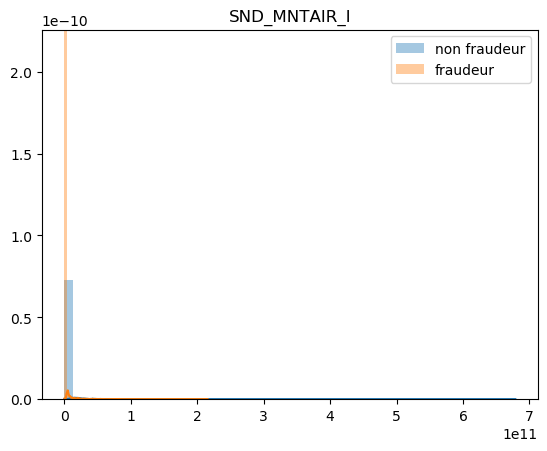

In [1121]:
for col in snd_i_columns:
    plt.figure()
    sns.distplot(n_fr[snd_i_columns], label = 'non fraudeur')
    sns.distplot(fr[snd_i_columns], label = 'fraudeur')
    plt.title(col)
    plt.legend()
    plt.show()


### Target / SND_A

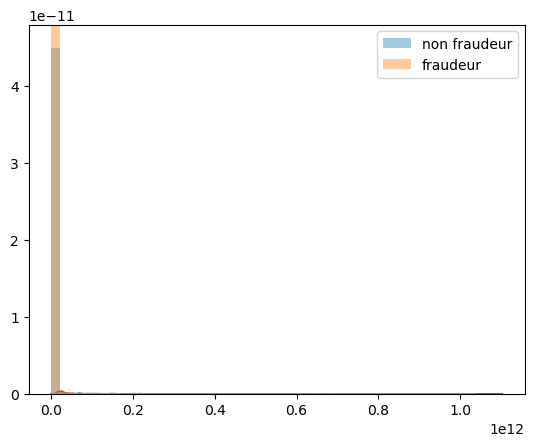

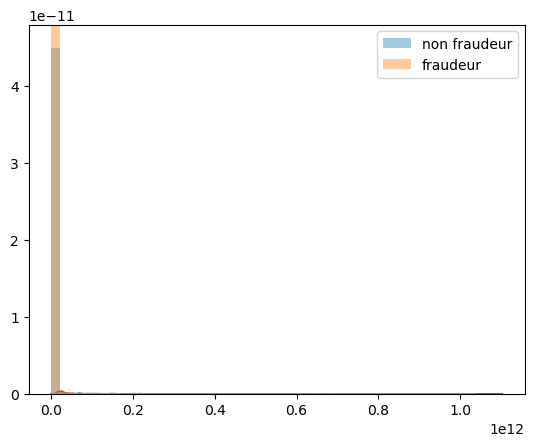

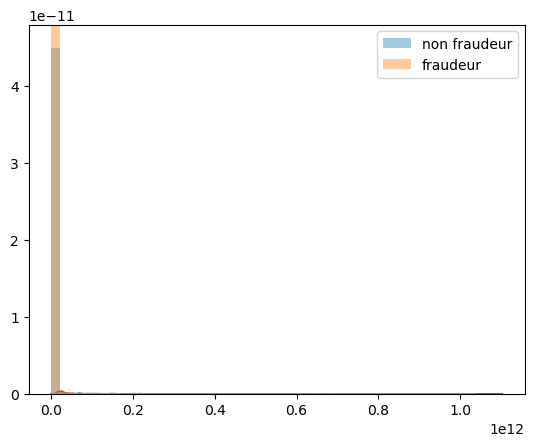

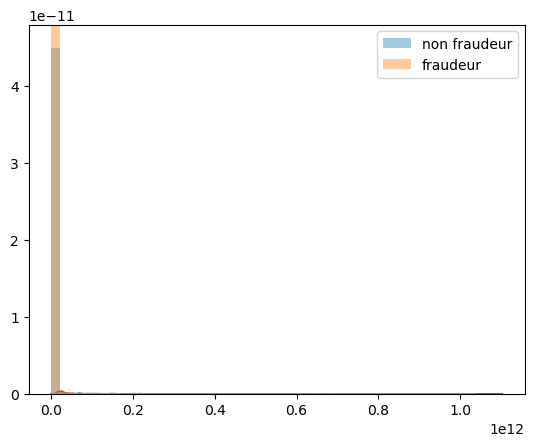

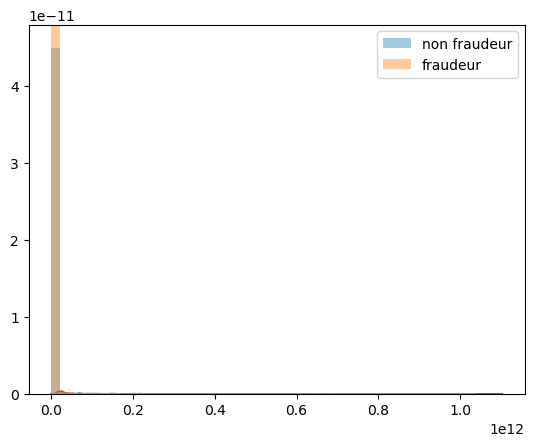

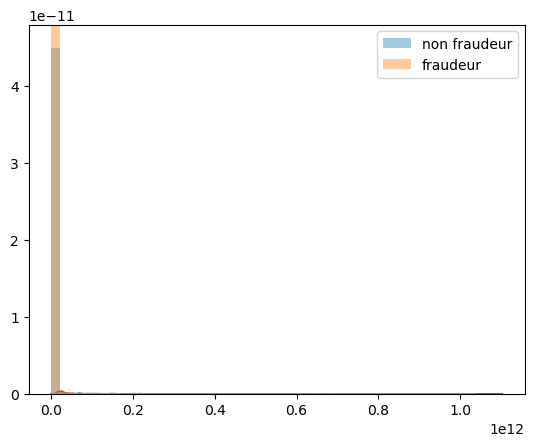

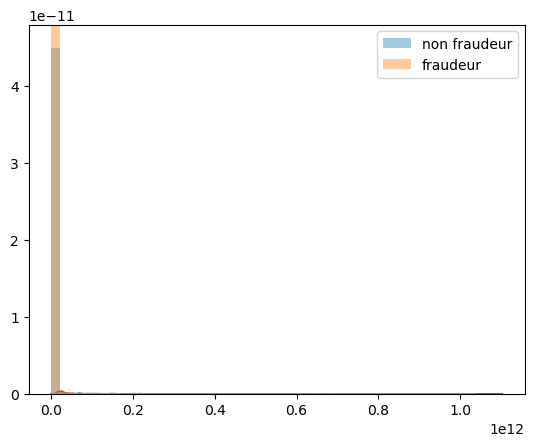

In [1122]:
for col in snd_a_columns:
    plt.figure()
    sns.distplot(n_fr[snd_a_columns], label = 'non fraudeur')
    sns.distplot(fr[snd_a_columns], label = 'fraudeur')
    plt.legend()

### Target / ADB

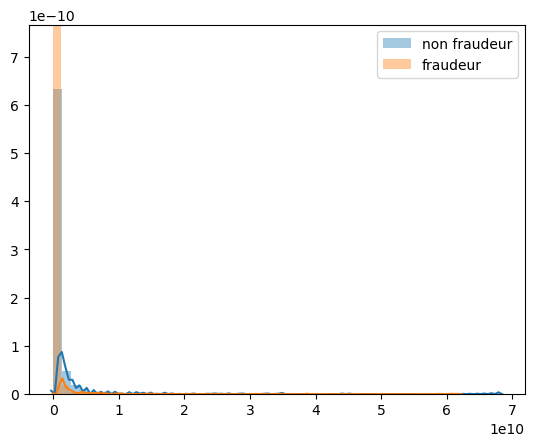

In [1123]:
for col in adb_columns:
    plt.figure()
    sns.distplot(n_fr[adb_columns], label = 'non fraudeur')
    sns.distplot(fr[adb_columns], label = 'fraudeur')
    plt.legend()

No handles with labels found to put in legend.


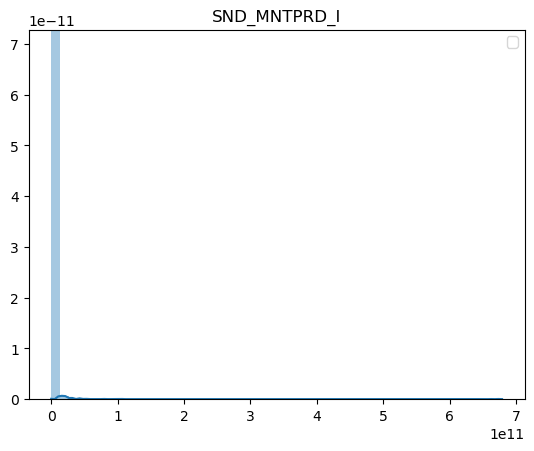

No handles with labels found to put in legend.


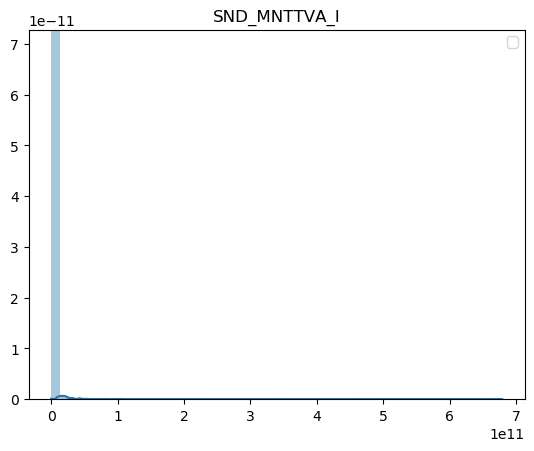

No handles with labels found to put in legend.


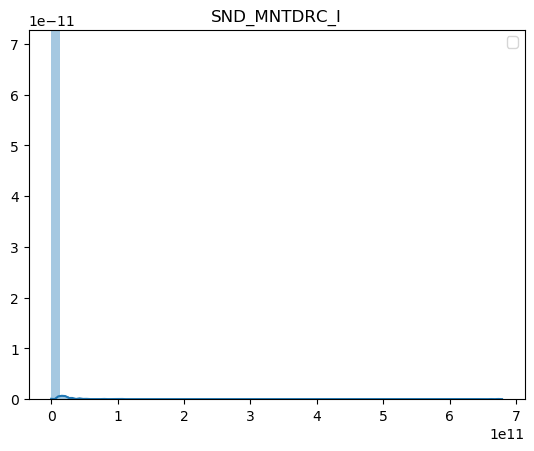

No handles with labels found to put in legend.


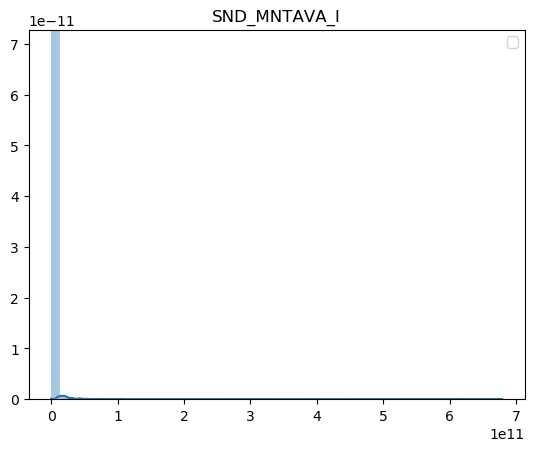

No handles with labels found to put in legend.


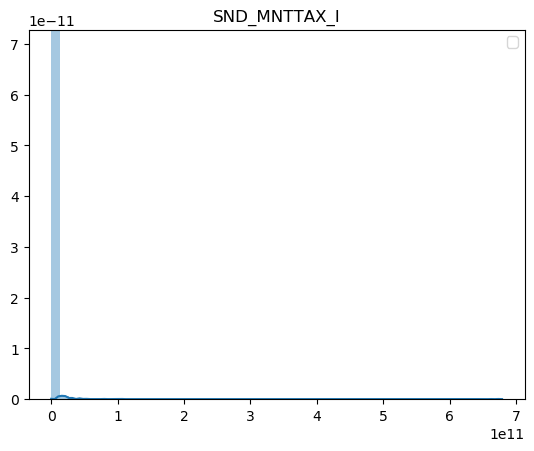

No handles with labels found to put in legend.


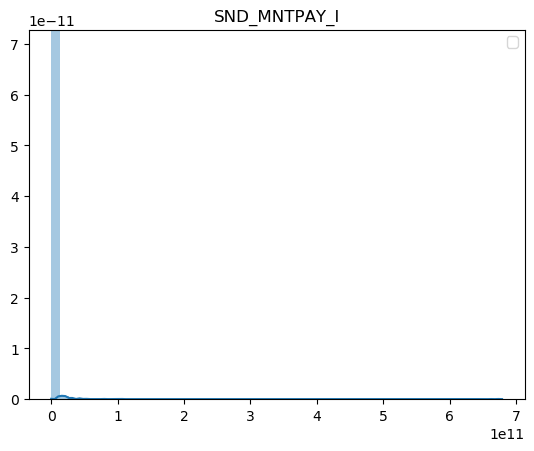

No handles with labels found to put in legend.


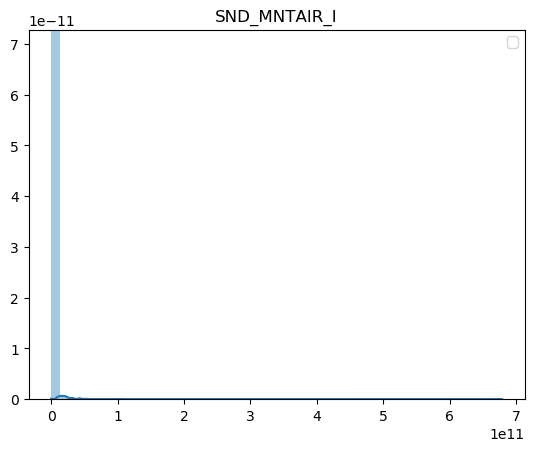

In [1124]:
for col in snd_i_columns:
    plt.figure()
    sns.distplot(df[snd_i_columns])
    #sns.distplot(fr[snd_i_columns], label = 'fraudeur')
    plt.title(col)
    plt.legend()
    plt.show()


In [1125]:
df_ax = df[['AX1_BRTIMP', 'AX2_HONORA', 'AX2_LOYERS', 'AX3_REVCAP' ,'AX5_MNTMAR','EXE_EXERCI' ,'ADB_MNTORD','target']]

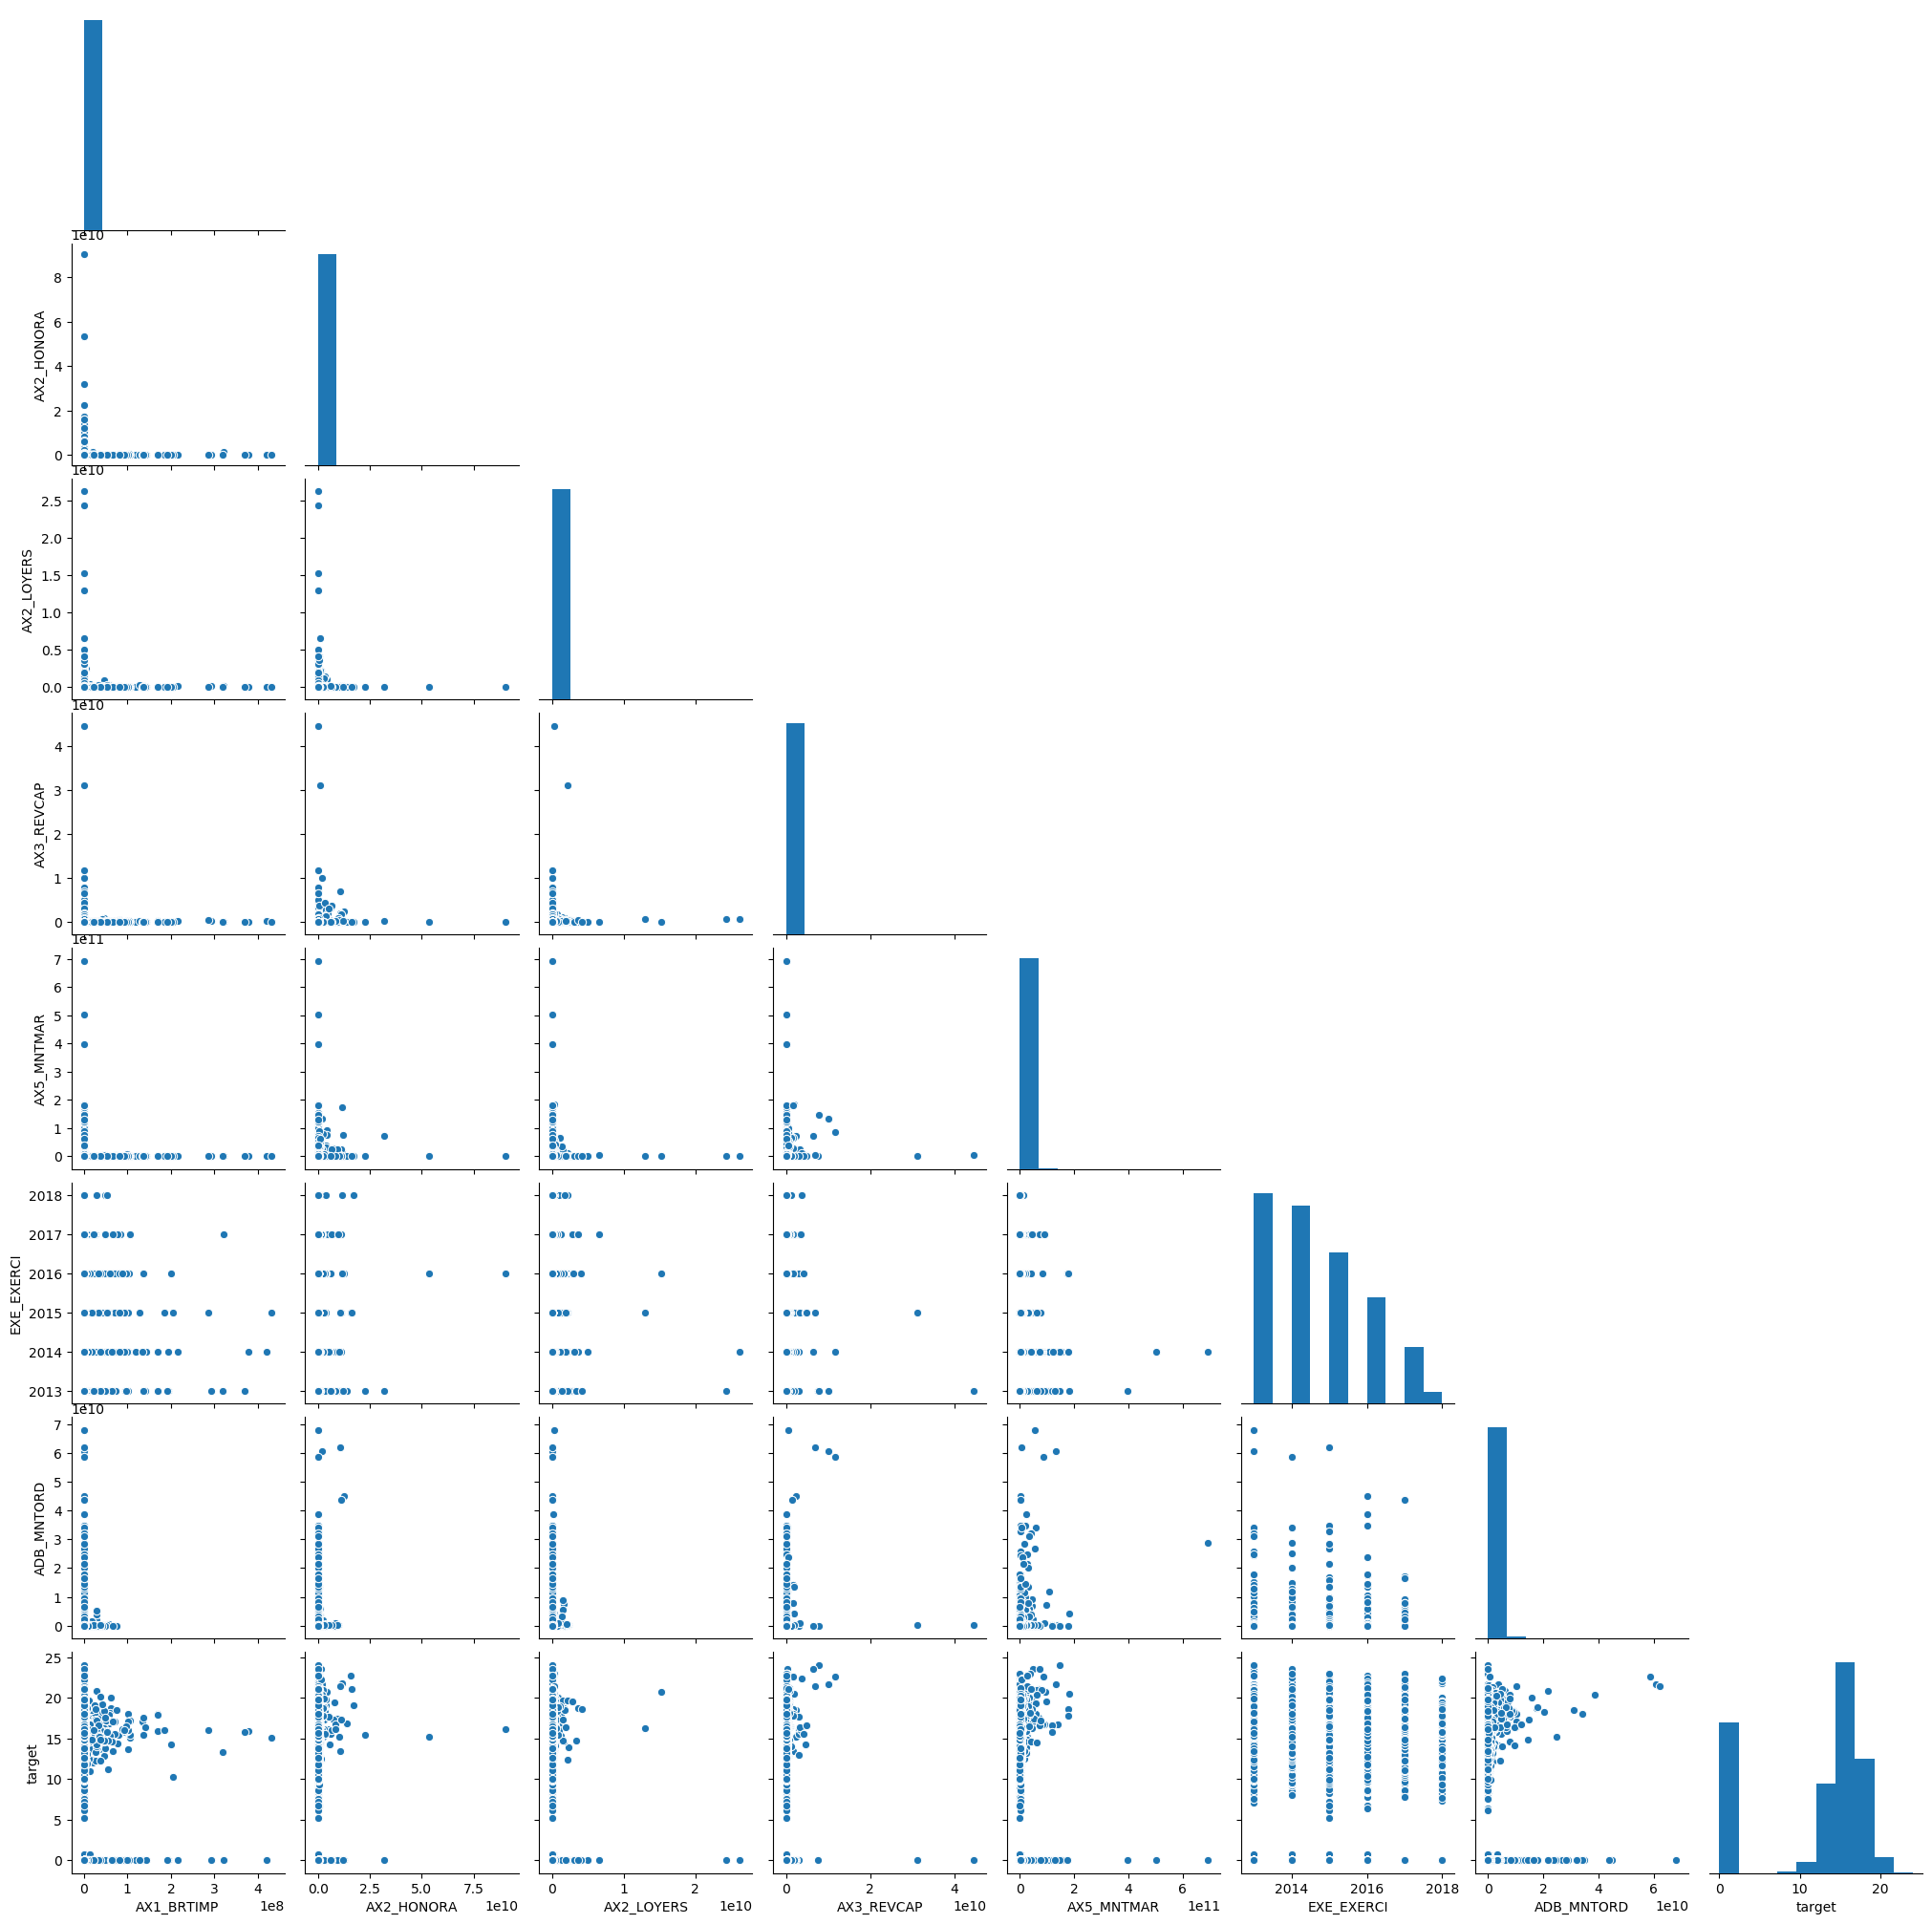

In [1126]:
sns.pairplot(df_ax, corner = True)

<Figure size 640x480 with 0 Axes>

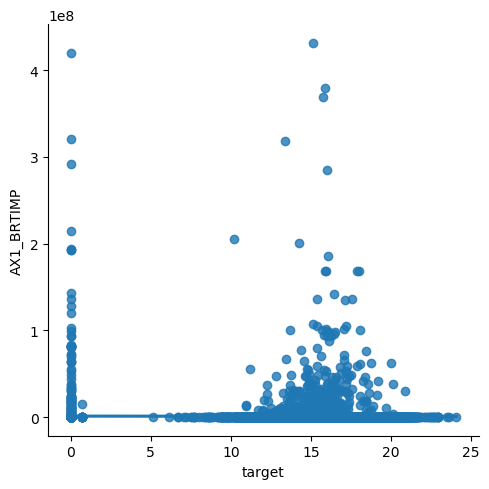

<Figure size 640x480 with 0 Axes>

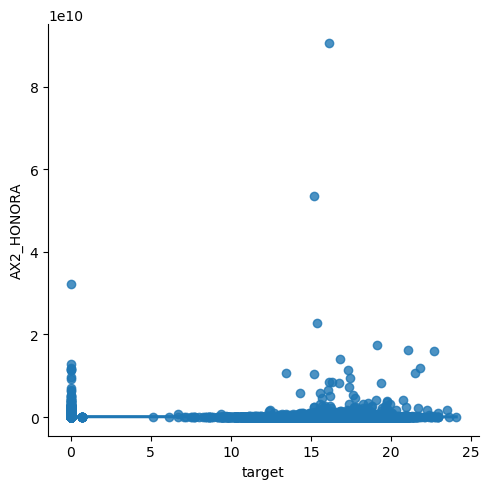

<Figure size 640x480 with 0 Axes>

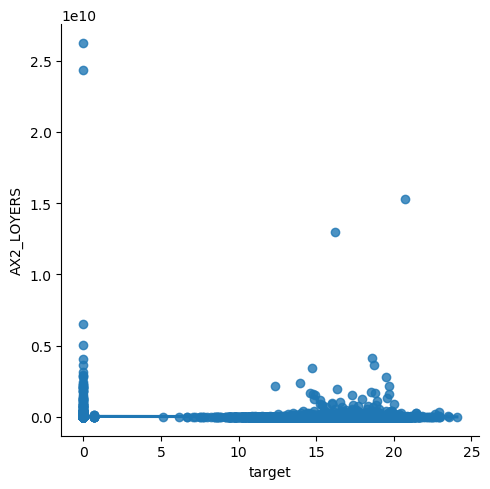

<Figure size 640x480 with 0 Axes>

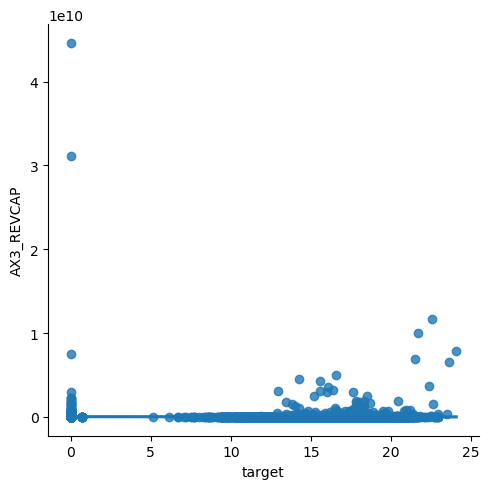

<Figure size 640x480 with 0 Axes>

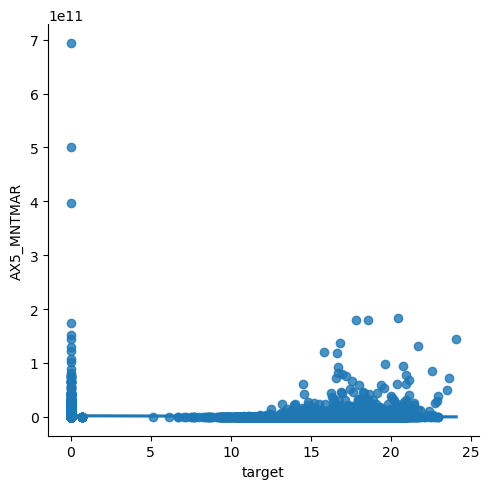

<Figure size 640x480 with 0 Axes>

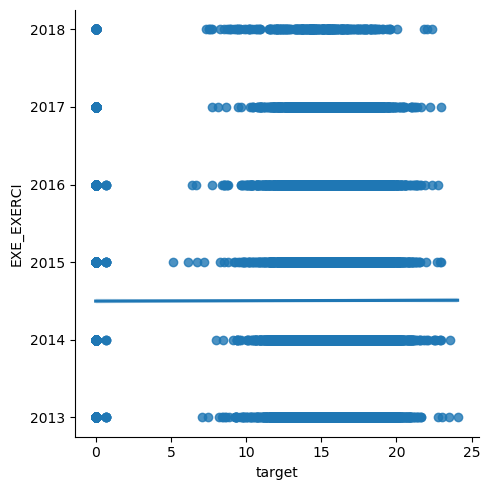

<Figure size 640x480 with 0 Axes>

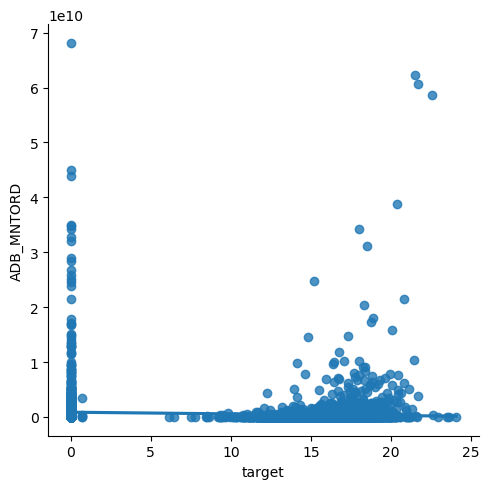

<Figure size 640x480 with 0 Axes>

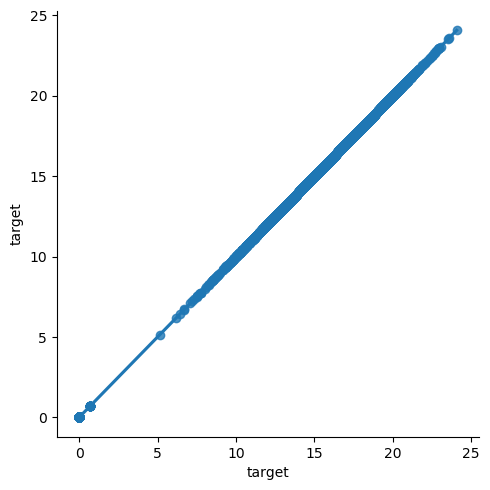

In [1127]:
for col in df_ax:
    plt.figure()
    sns.lmplot(x='target', y= col, data=df_ax)

In [1133]:
df_tva = df[['TVA_CHAF12','TVA_CRDFIN','TVA_CHAF18', 'TVA_MNTPAY','TVA_TOTDUE', 'TVA_CRDINI', 'TVA_DEDAUI',  'TVA_CRDRMC', 'TVA_MACHN', 'TVA_DEDAUL','CTR_CATEGO_X', 'target']]

In [1134]:
df_tva.describe()

,TVA_CHAF12,TVA_CRDFIN,TVA_CHAF18,TVA_MNTPAY,TVA_TOTDUE,TVA_CRDINI,TVA_DEDAUI,TVA_CRDRMC,TVA_MACHN,TVA_DEDAUL,CTR_CATEGO_X,target
count,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,2.307900e+04,25053.000000,25053.000000
mean,1.821056e+08,6.580949e+07,1.849092e+09,6.718077e+07,3.892477e+08,6.457708e+07,8.709237e+07,5.697102e+06,3.567376e+06,1.986668e+08,0.705065,11.803844
std,2.654419e+09,6.080016e+08,2.081698e+10,1.707245e+09,4.058089e+09,5.460481e+08,7.486376e+08,1.770222e+08,5.163834e+07,1.737422e+09,0.800959,7.078453
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.952745e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.655000e+03,0.000000,0.000000
50%,0.000000e+00,8.123500e+04,3.178771e+06,0.000000e+00,7.129209e+06,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,3.859654e+06,0.000000,14.989208
75%,2.180298e+06,1.128872e+07,2.956275e+08,2.247032e+06,8.011544e+07,1.124923e+07,0.000000e+00,0.000000e+00,0.000000e+00,4.971139e+07,1.000000,16.633323
max,2.029446e+11,4.252469e+10,1.148010e+12,1.070667e+11,2.068606e+11,3.539171e+10,3.578709e+10,1.102489e+10,3.065412e+09,6.946318e+10,3.000000,24.067398


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To con

<Figure size 640x480 with 0 Axes>

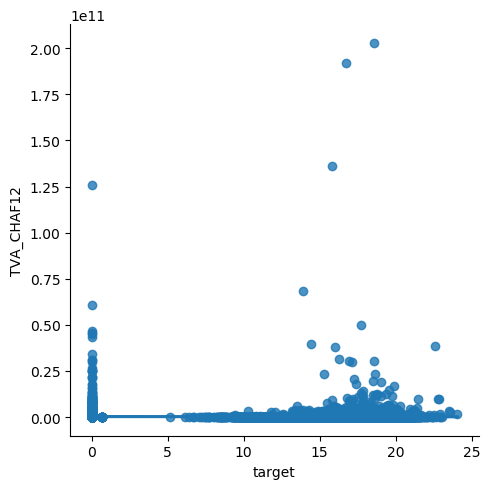

<Figure size 640x480 with 0 Axes>

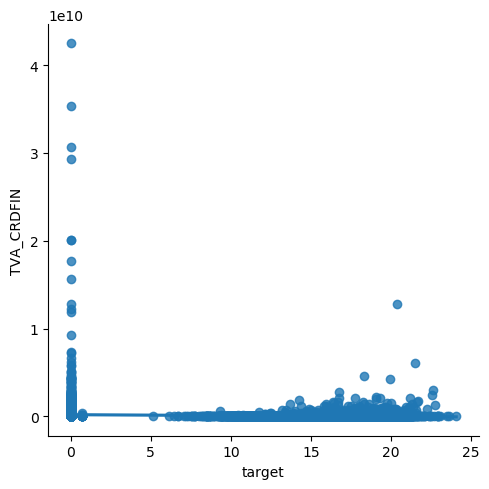

<Figure size 640x480 with 0 Axes>

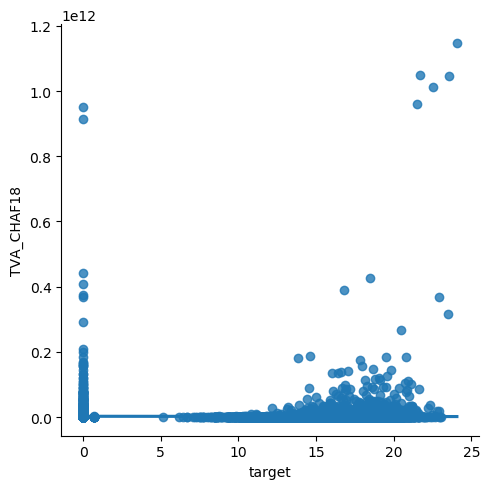

<Figure size 640x480 with 0 Axes>

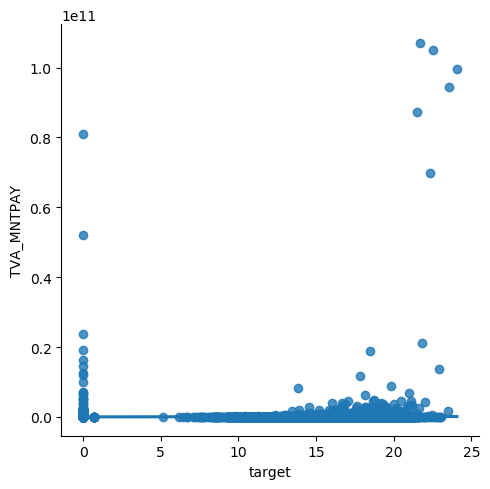

<Figure size 640x480 with 0 Axes>

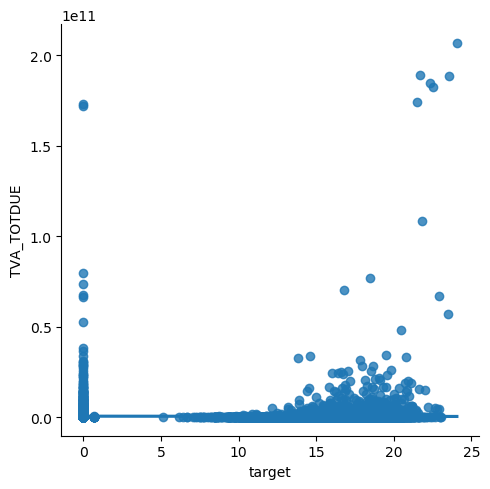

<Figure size 640x480 with 0 Axes>

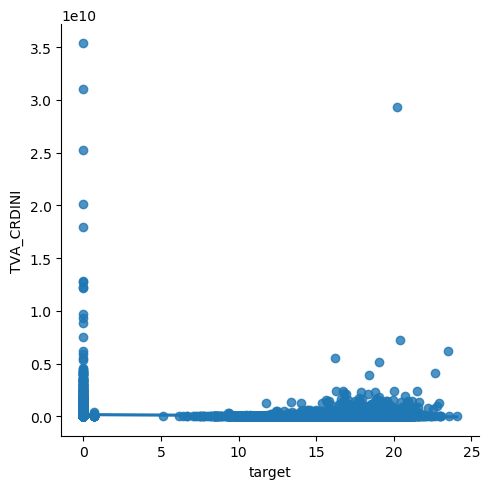

<Figure size 640x480 with 0 Axes>

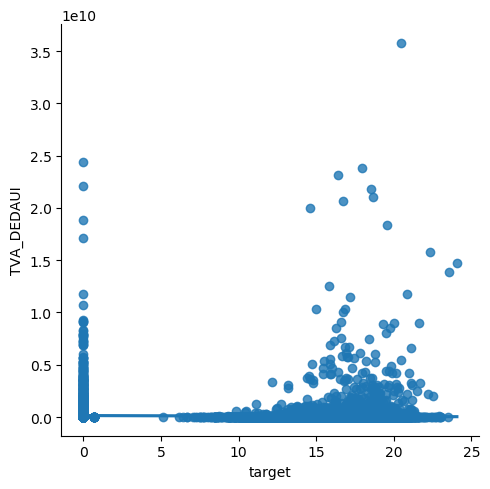

<Figure size 640x480 with 0 Axes>

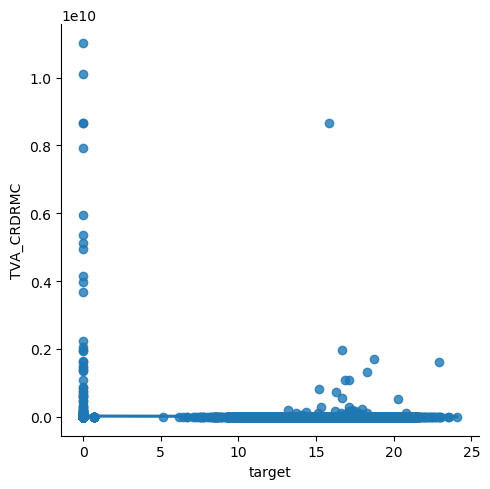

<Figure size 640x480 with 0 Axes>

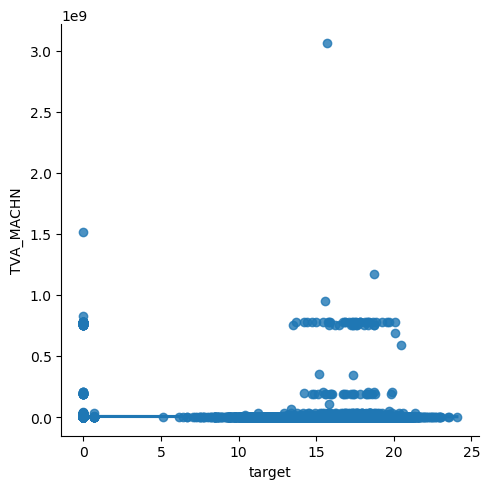

<Figure size 640x480 with 0 Axes>

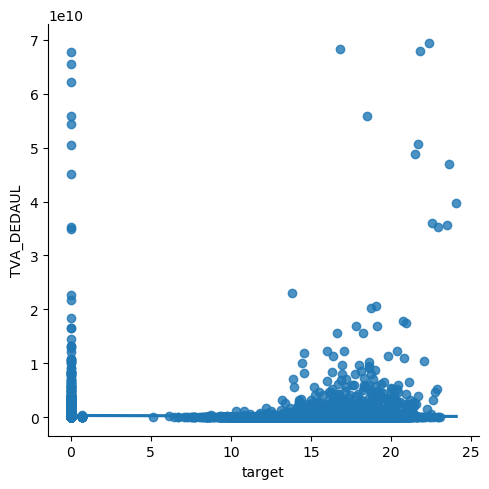

<Figure size 640x480 with 0 Axes>

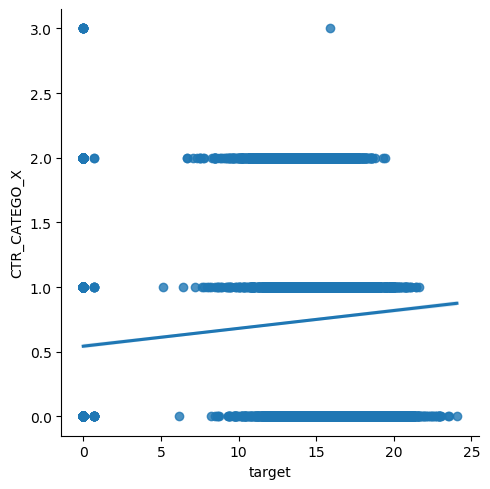

<Figure size 640x480 with 0 Axes>

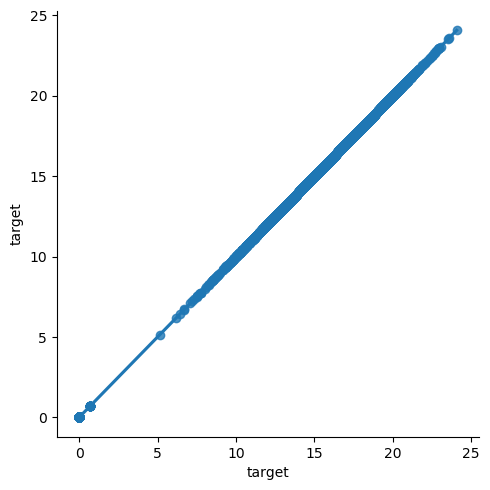

In [1135]:
for col in df_tva:
    plt.figure()
    sns.lmplot(x='target', y= col, data=df_tva)

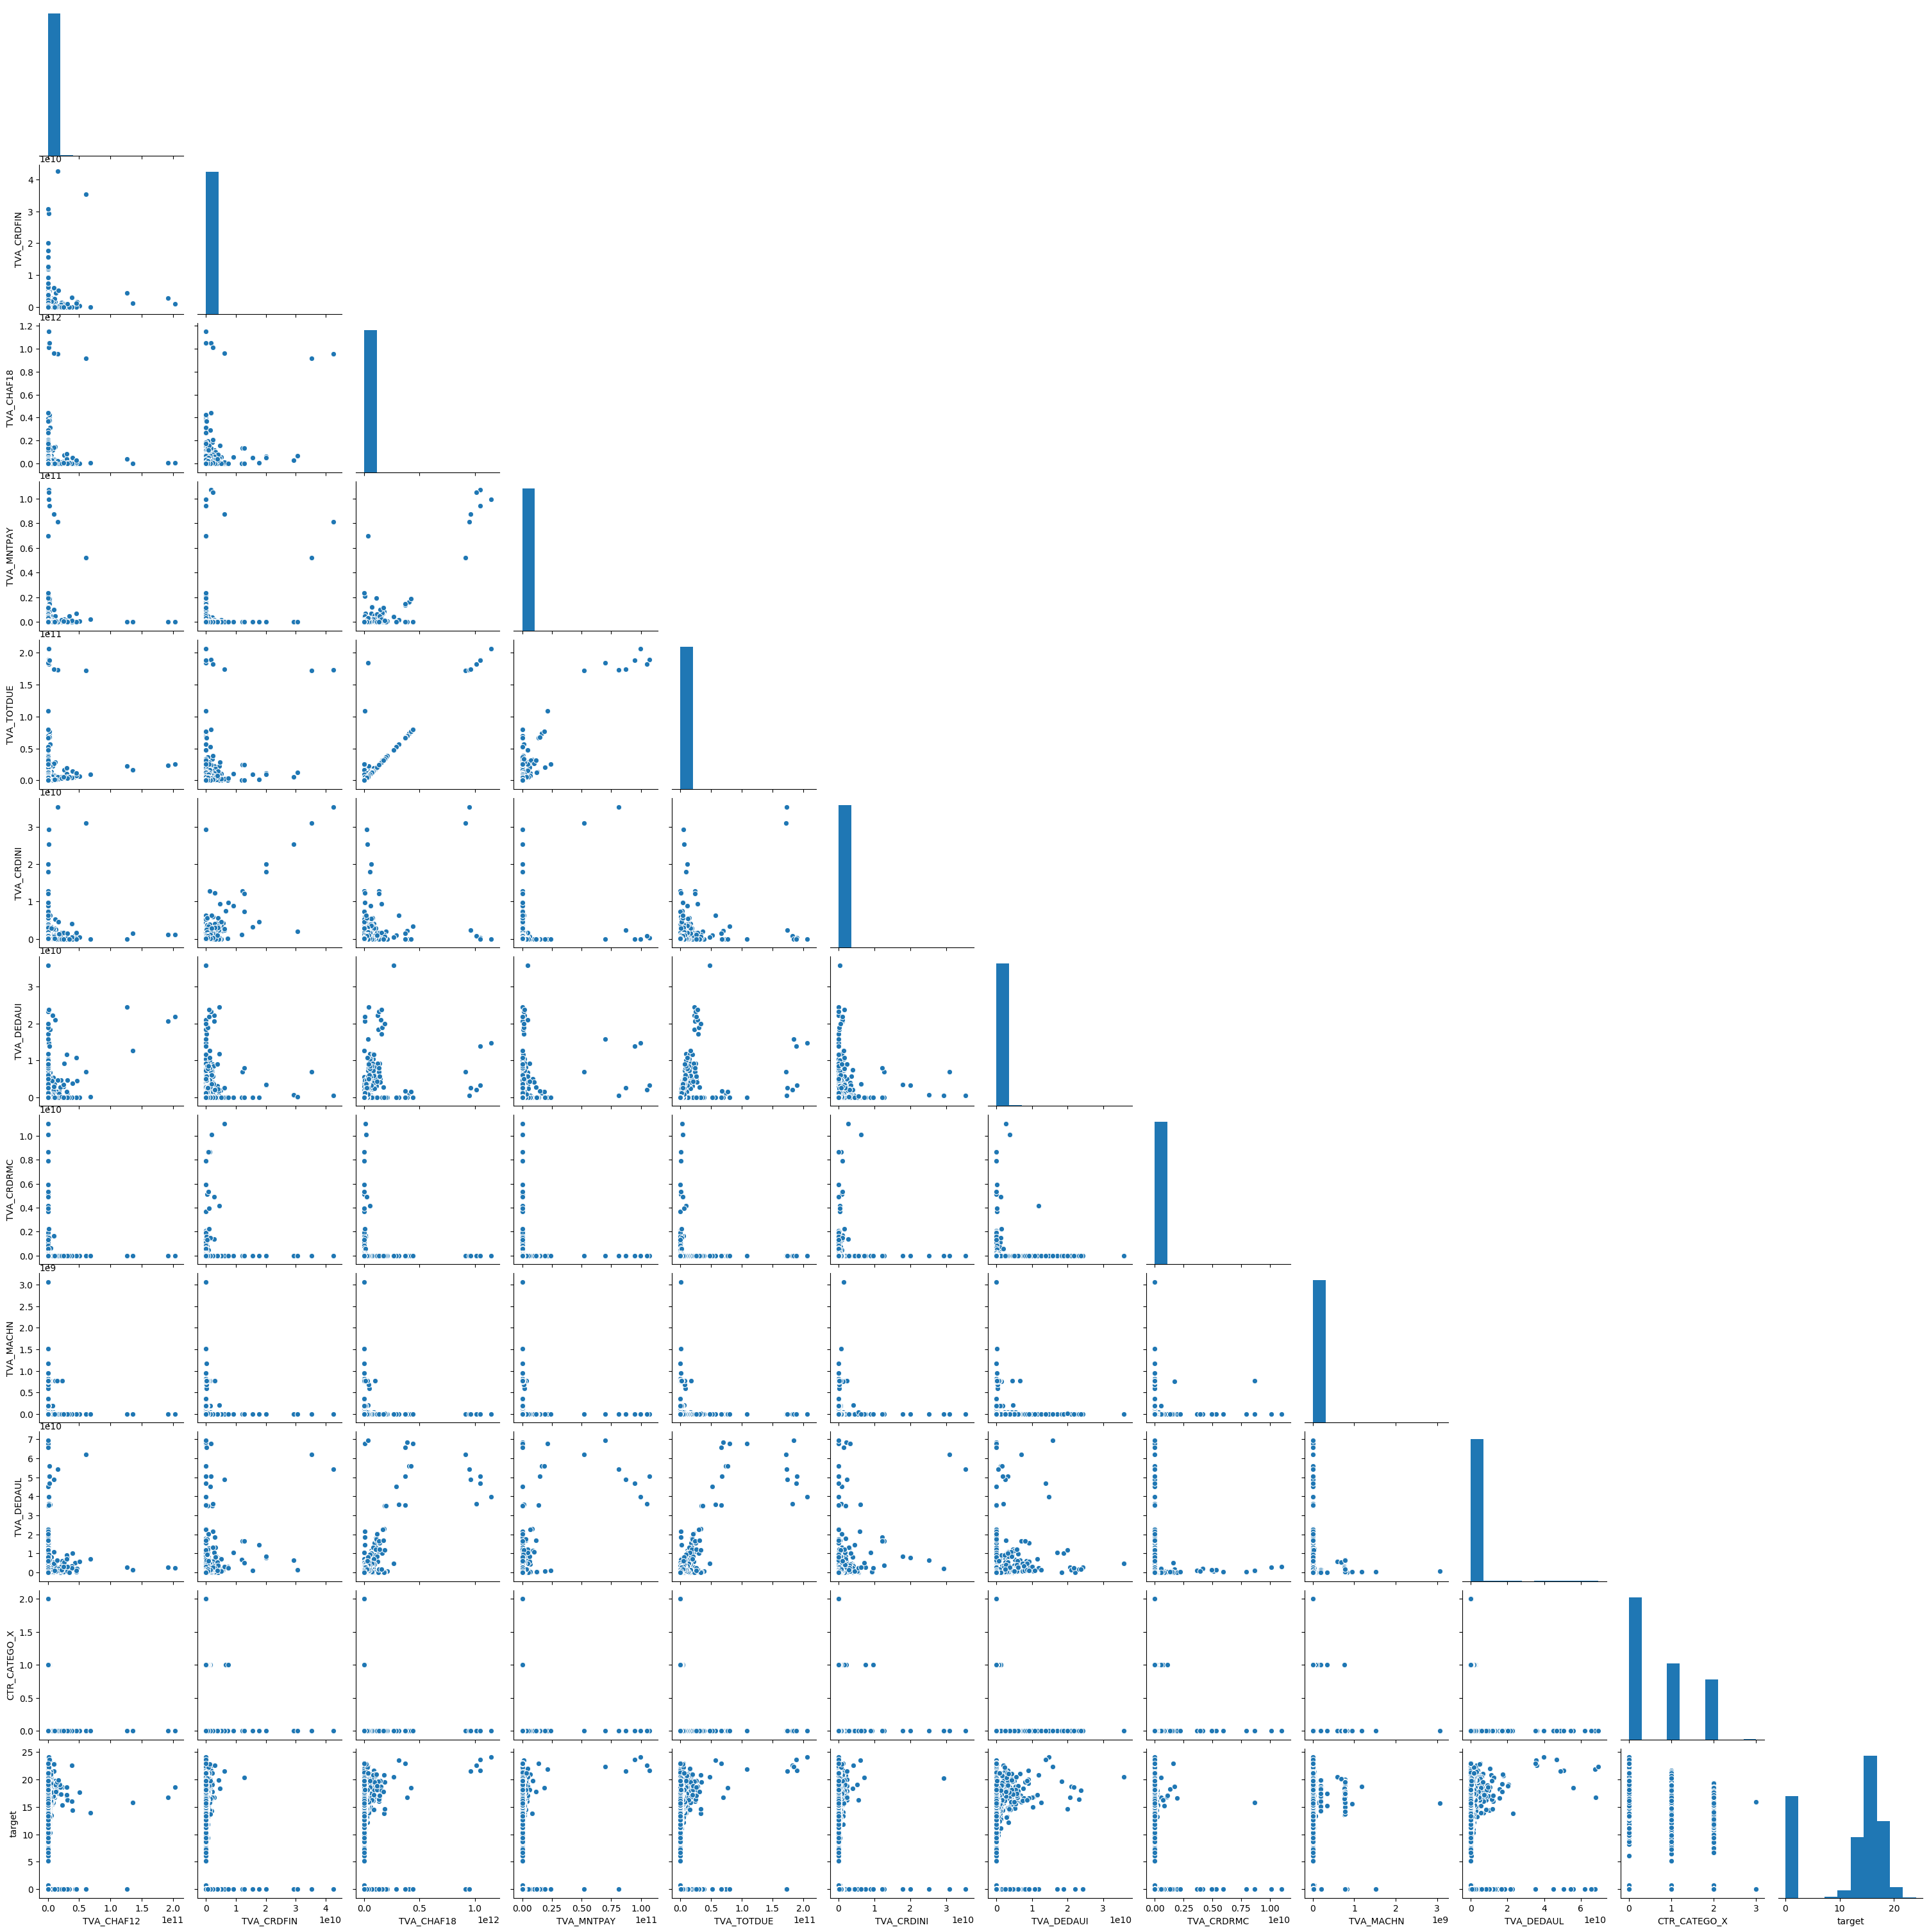

In [1137]:
sns.pairplot(df_tva, corner= True)

### Modelisation

In [1223]:
from sklearn.model_selection import train_test_split

In [1224]:
trainset, testset =train_test_split(df, test_size=0.2, random_state=0)

In [1225]:
def imput(df):
    return df.dropna(axis=0)

In [1226]:
def preprocessing(df):
    df = imput(df)
    
    X = df.drop(['target'], axis=1)
    y = df['target']
    
    return X, y

In [1227]:
X_train, y_train = preprocessing(trainset)

In [1228]:
X_test, y_test = preprocessing(testset)

In [1229]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [1230]:
mod = DecisionTreeRegressor(random_state=0)
mod_ran = RandomForestRegressor(random_state=0)
mod_regr = linear_model.LinearRegression()

### Evaluation

In [1231]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

In [1232]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)

    print('Mean_squared_error: %.2f' %mean_squared_error(y_test, ypred))
    print('Coefficient of determination: %.2f' %r2_score(y_test, ypred))
    

### DecisionTres

In [1233]:
evaluation(mod)

Mean_squared_error: 95.39
Coefficient of determination: -0.23


### RandomForest

In [1234]:
evaluation(mod_ran)

Mean_squared_error: 47.07
Coefficient of determination: 0.39


### LinearRegression

In [1235]:
evaluation(mod_regr)

Mean_squared_error: 124.14
Coefficient of determination: -0.60


### feature_importances  avec "DecisionTree" et "RandomForest"

In [1236]:
models =[mod, mod_ran]

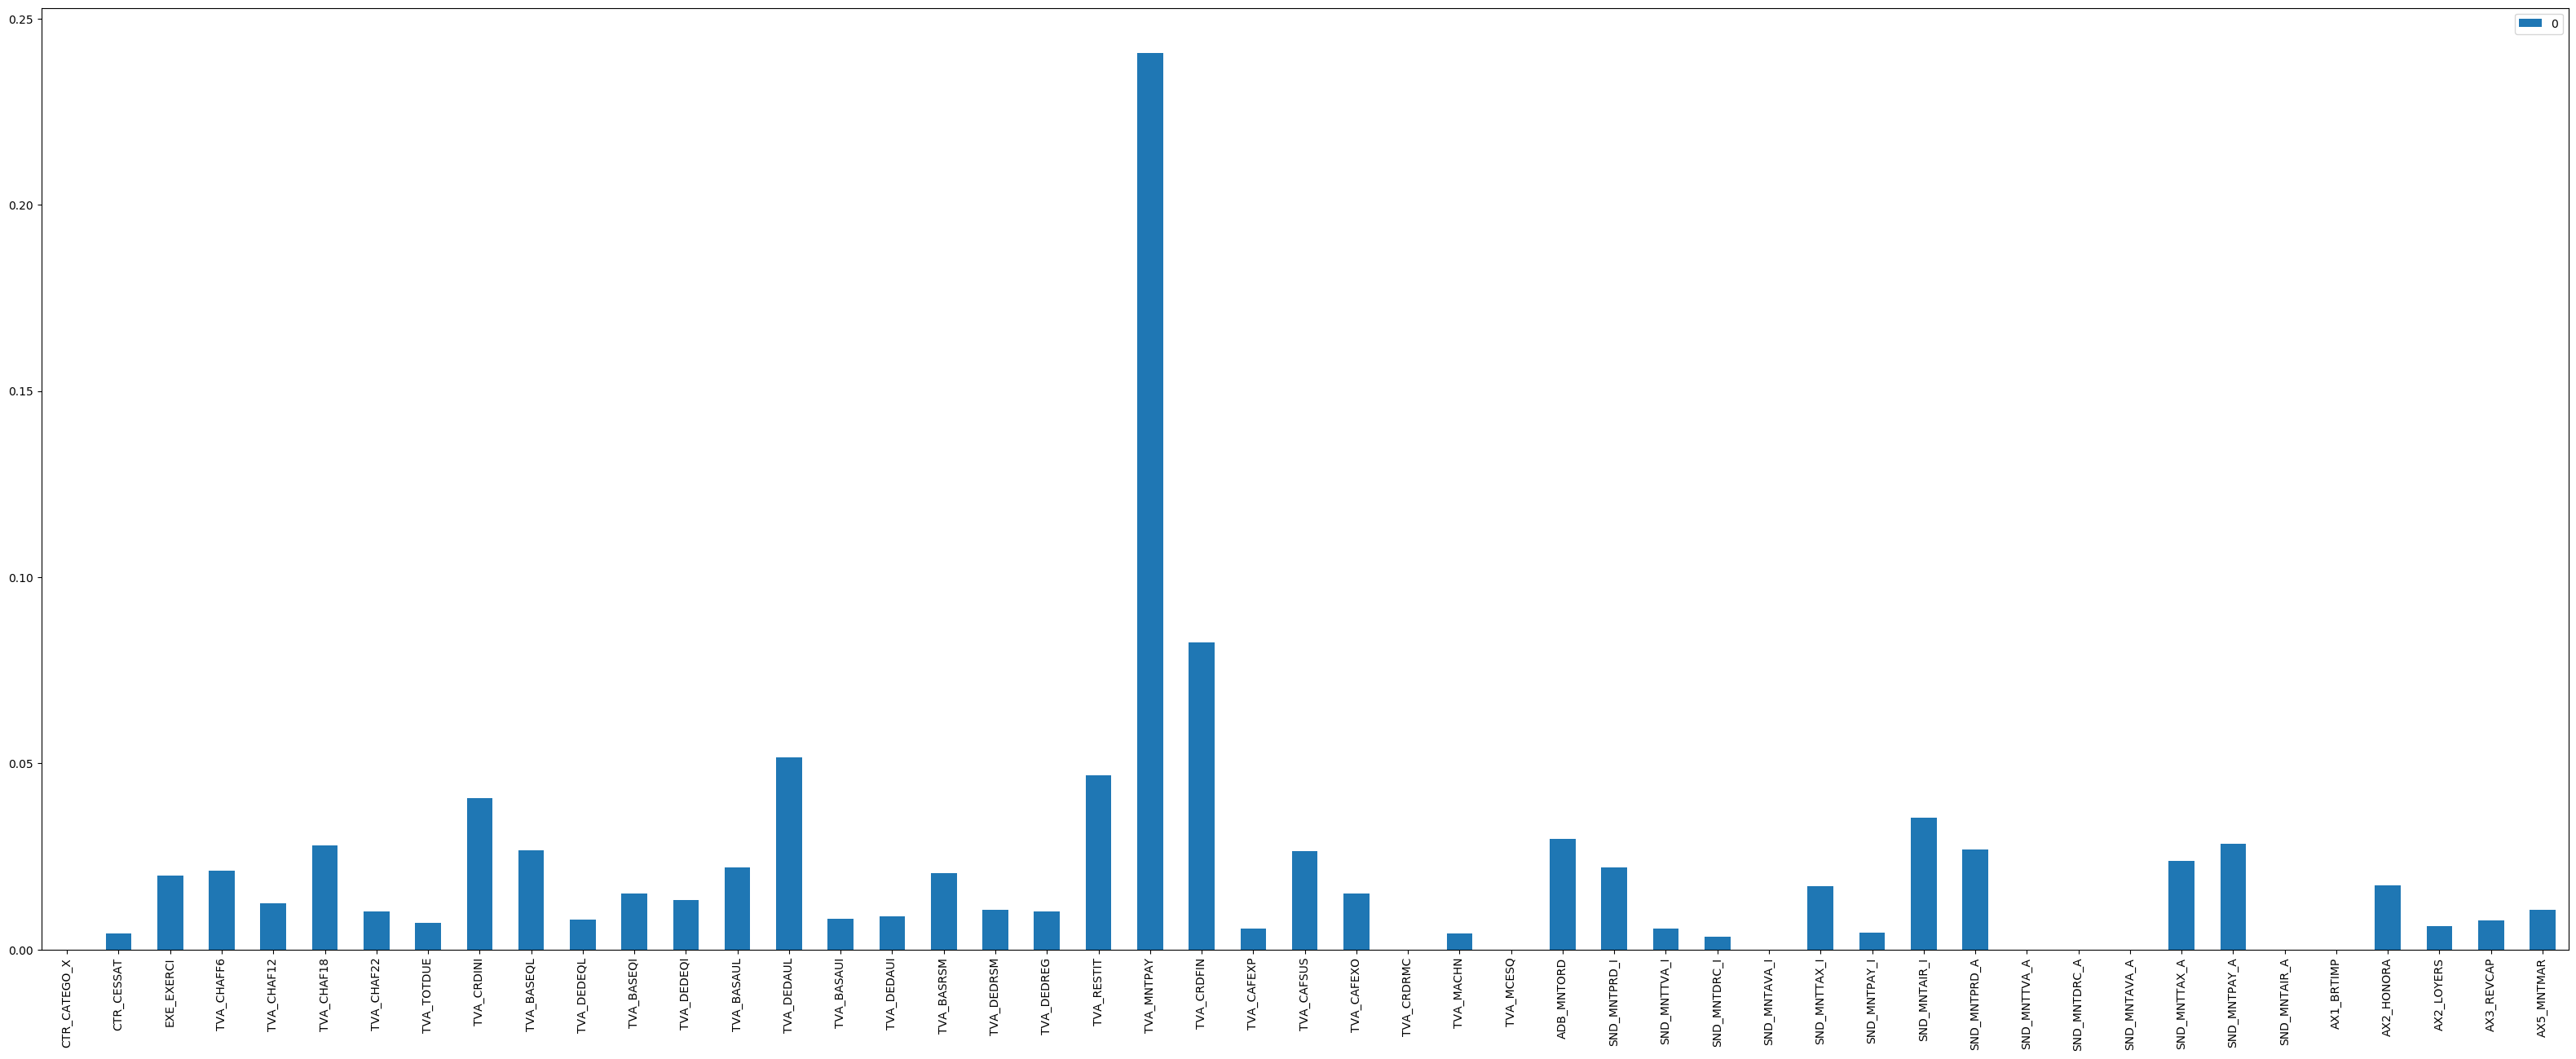

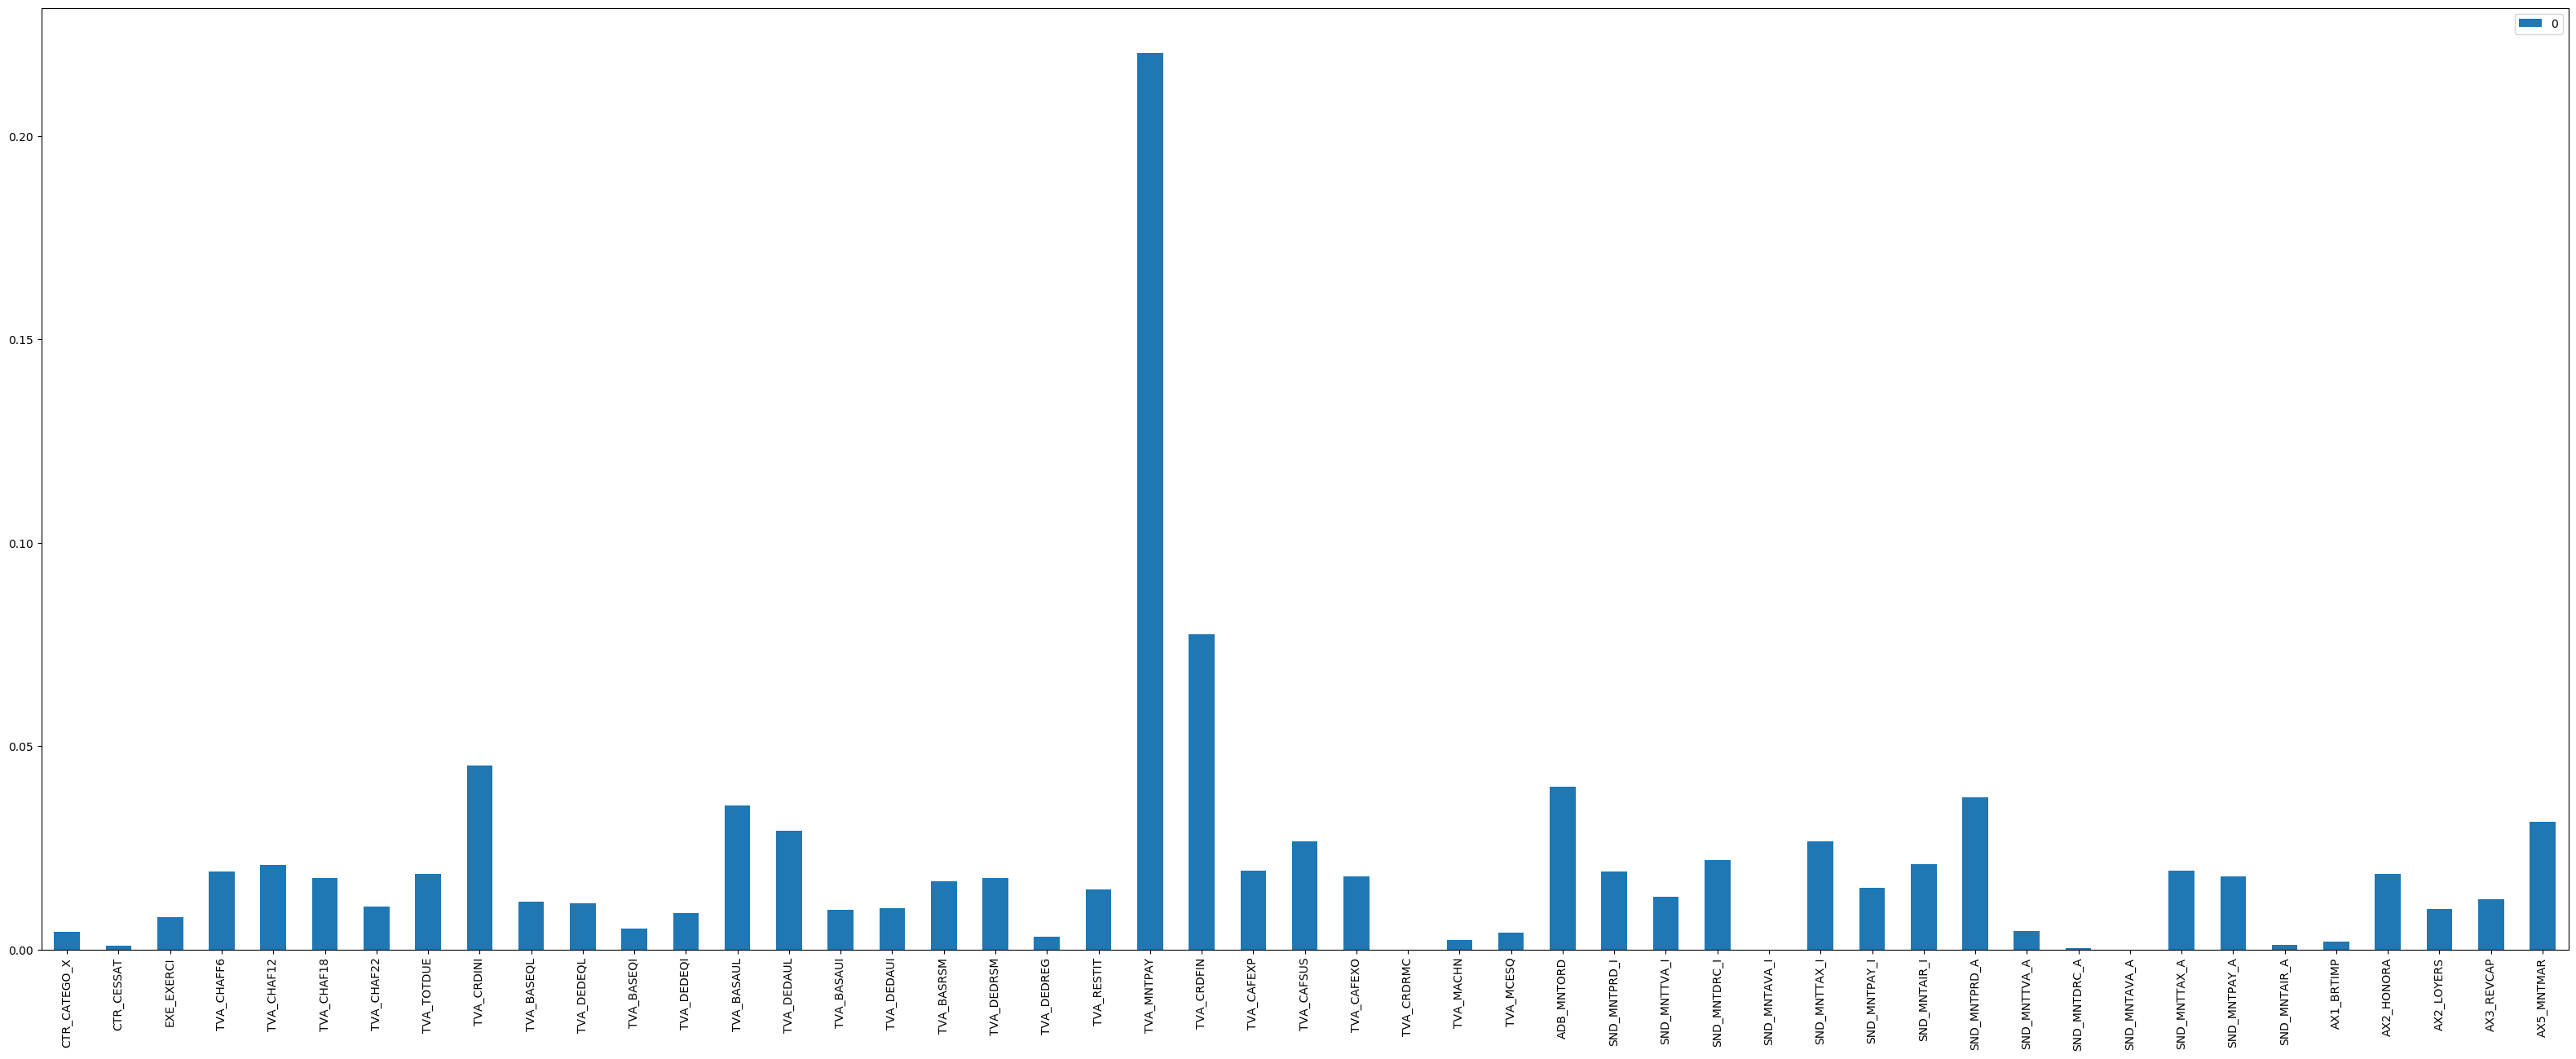

In [1237]:
for m in models:
    pd.DataFrame(m.feature_importances_,index= X_train.columns).plot.bar(figsize=(40,15))
    plt.show()